# Импортирование библиотек

In [5]:
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import missingno as msno
%matplotlib inline
sns.set_theme(style="whitegrid")
import re

In [6]:
# Подключение к гугл диску
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Загрузка таблиц

In [7]:
df = pd.read_csv('/content/drive/MyDrive/ИТМО/Предсказание вакансии/vacancy_9.csv', on_bad_lines='skip', sep='|')

<ipython-input-7-7bcbf3ac4f6d>:1: DtypeWarning: Columns (1,3,14,16,24,25,33,41,44,56,63,69) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/ИТМО/Предсказание вакансии/vacancy_9.csv', on_bad_lines='skip', sep='|')


In [8]:
print(df.shape)

(147469, 78)


In [9]:
df.head()

id academic_degree  \
0  47a49650-ab9c-11ed-8f68-c915d4ea89c1             NaN   
1  479fb085-82c5-11ee-bf4e-e7d0d2cf29b1             NaN   
2  479c2a95-4e6e-11ee-a42c-3d3a7b5fc4bc             NaN   
3  478dc372-03aa-11ed-bddd-bf2cfe8c828d             NaN   
4  478a4875-8230-11ee-b2cf-cb26dff57dd7             NaN   

   accommodation_capability accommodation_type  additional_premium  \
0                     False                NaN                 NaN   
1                     False                NaN                 NaN   
2                     False                NaN                 NaN   
3                     False                NaN                 NaN   
4                     False                NaN                 NaN   

                             additional_requirements bonus_type measure_type  \
0                                                NaN        NaN          NaN   
1                                                NaN        NaN          NaN   
2  <ul> <li>График работы 2/2 (дневные смены)</li...        NaN          NaN   
3  Квотируемое рабочее место<br/>детское питание<...        NaN          NaN   
4                                                NaN        NaN          NaN   

          busy_type  career_perspective  ... federalDistrictCode  \
0  Полная занятость               False  ...                   1   
1  Полная занятость               False  ...                   1   
2  Полная занятость                True  ...                   1   
3  Полная занятость               False  ...                   1   
4  Полная занятость                True  ...                   1   

  industryBranchName  contactList company_name  \
0                NaN          NaN          NaN   
1                NaN          NaN          NaN   
2                NaN          NaN          NaN   
3                NaN          NaN          NaN   
4                NaN          NaN          NaN   

                                   full_company_name   company_inn  \
0                                    ЗАО "УграКерам"  4.001007e+09   
1  МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ УЧ...  5.077011e+09   
2  ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "ГРУП...  5.029015e+09   
3  МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...  4.026009e+09   
4  МУНИЦИПАЛЬНОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ "МОНИТОРИНГ ...  5.040138e+09   

                                             company languageKnowledge  \
0  {"companycode":"1084001001700","email":"elena....                []   
1  {"companycode":"1025007772800","email":"lipicy...                []   
2  {"companycode":"1025003531662","email":"teplol...                []   
3  {"companycode":"1024001339933","email":"dou_15...                []   
4  {"companycode":"1155040007737","email":"munkon...                []   

  hardSkills softSkills  
0         []         []  
1         []         []  
2         []         []  
3         []         []  
4         []         []  

[5 rows x 78 columns]

## Общая информация

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147469 entries, 0 to 147468
Data columns (total 78 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   id                               147469 non-null  object 
 1   academic_degree                  91 non-null      object 
 2   accommodation_capability         147469 non-null  bool   
 3   accommodation_type               6767 non-null    object 
 4   additional_premium               17916 non-null   float64
 5   additional_requirements          62697 non-null   object 
 6   bonus_type                       18012 non-null   object 
 7   measure_type                     17786 non-null   object 
 8   busy_type                        147469 non-null  object 
 9   career_perspective               147469 non-null  bool   
 10  change_time                      140519 non-null  object 
 11  code_external_system             41455 non-null   object 
 12  co

In [11]:
# Описательная статистика по каждому столбцу
pd.set_option('display.float_format', lambda x:'%.3f'%x)
df.describe(include='all')

id academic_degree  \
count                                 147469              91   
unique                                147469               2   
top     47a49650-ab9c-11ed-8f68-c915d4ea89c1   Кандидат наук   
freq                                       1              74   
mean                                     NaN             NaN   
std                                      NaN             NaN   
min                                      NaN             NaN   
25%                                      NaN             NaN   
50%                                      NaN             NaN   
75%                                      NaN             NaN   
max                                      NaN             NaN   

       accommodation_capability accommodation_type  additional_premium  \
count                    147469               6767           17916.000   
unique                        2                  4                 NaN   
top                       False          DORMITORY                 NaN   
freq                     139243               4696                 NaN   
mean                        NaN                NaN            3207.145   
std                         NaN                NaN           13269.756   
min                         NaN                NaN               0.000   
25%                         NaN                NaN              25.000   
50%                         NaN                NaN              50.000   
75%                         NaN                NaN             100.000   
max                         NaN                NaN          737000.000   

       additional_requirements bonus_type measure_type         busy_type  \
count                    62697      18012        17786            147469   
unique                   38516          3            2                 6   
top            Ответственность    MONTHLY      PERCENT  Полная занятость   
freq                      3656      13216        13922            139096   
mean                       NaN        NaN          NaN               NaN   
std                        NaN        NaN          NaN               NaN   
min                        NaN        NaN          NaN               NaN   
25%                        NaN        NaN          NaN               NaN   
50%                        NaN        NaN          NaN               NaN   
75%                        NaN        NaN          NaN               NaN   
max                        NaN        NaN          NaN               NaN   

       career_perspective  ... federalDistrictCode  \
count              147469  ...          147469.000   
unique                  2  ...                 NaN   
top                 False  ...                 NaN   
freq               142998  ...                 NaN   
mean                  NaN  ...               1.000   
std                   NaN  ...               0.000   
min                   NaN  ...               1.000   
25%                   NaN  ...               1.000   
50%                   NaN  ...               1.000   
75%                   NaN  ...               1.000   
max                   NaN  ...               1.000   

                industryBranchName  contactList company_name  \
count                          725        0.000        0.000   
unique                          11          NaN          NaN   
top     Авиационная промышленность          NaN          NaN   
freq                           189          NaN          NaN   
mean                           NaN          NaN          NaN   
std                            NaN          NaN          NaN   
min                            NaN          NaN          NaN   
25%                            NaN          NaN          NaN   
50%                            NaN          NaN          NaN   
75%                            NaN          NaN          NaN   
max                            NaN          NaN          NaN   

       full_company_name      company_inn  \
count   

## Перевод столбцов

id

учёная степень

возможность размещения

тип размещения

дополнительная премия

дополнительные требования

тип премии

тип меры

тип занятости

перспектива карьеры

время изменений

код внешняя система

код профессия

код профессиональной сферы

код компании

контактное лицо

источник контактов

идентификаторы данных

дата создания

дата изменения

удалено

образование

специальность образования

возможность привлечения иностранных работников

идентификаторы метро

программа мобильности

модерируется

узбекистан рекрутинг

котируется

нужна медкарточка

код окнпо

код оксо

тип первоисточника

другое преимущество вакансии

требования к должности

должностные обязанности

период публикации

дата публикации

regionName

regionNameTerm

размер предприятия

необходимые сертификаты

необходимые водительские права

необходимый опыт

возможность переподготовки

условие переподготовки

грант на переподготовку

стоимость гранта на переподготовку

зарплата

оклад минимальный

оклад макс

тип расписания

идентификаторы социальной защиты

тип источника

код региона штата

статус

транспортная компенсация

адрес вакансии дополнительная информация

адрес вакансии

адрес вакансии код

адрес вакансии дом

адрес вакансии широта

адрес вакансии долгота

идентификаторы вакансий

название вакансии

видимость

рабочие места

professionalSphereName

federalDistrictCode

industryBranchName

contactList

название компании

полное название компании

гостиница компании

компания

languageKnowledge

hardSkills

softSkills

## Кол-во пропусков

In [12]:
# Список всех столбцов
list_columns = list(df.columns)

In [13]:
for num, column in enumerate(list_columns):
  print(num, ': ', df[f'{column}'].isna().sum())

0 :  0
1 :  147378
2 :  0
3 :  140702
4 :  129553
5 :  84772
6 :  129457
7 :  129683
8 :  0
9 :  0
10 :  6950
11 :  106014
12 :  17629
13 :  0
14 :  0
15 :  26
16 :  121256
17 :  0
18 :  0
19 :  0
20 :  0
21 :  0
22 :  130386
23 :  147469
24 :  140016
25 :  115215
26 :  0
27 :  0
28 :  0
29 :  105616
30 :  147469
31 :  135479
32 :  0
33 :  106126
34 :  13782
35 :  4242
36 :  3
37 :  0
38 :  85
39 :  147469
40 :  0
41 :  140610
42 :  0
43 :  5070
44 :  141785
45 :  147469
46 :  0
47 :  146976
48 :  1871
49 :  1871
50 :  3026
51 :  0
52 :  138849
53 :  0
54 :  0
55 :  0
56 :  142791
57 :  76318
58 :  85
59 :  0
60 :  32116
61 :  566
62 :  566
63 :  142926
64 :  6
65 :  0
66 :  0
67 :  0
68 :  0
69 :  146744
70 :  147469
71 :  147469
72 :  3121
73 :  36
74 :  0
75 :  0
76 :  0
77 :  0


In [14]:
# Посчитаем какую часть составляют пропуски от общего количества элементов
for num, column in enumerate(list_columns):
  print(num, ': ', round(df[f'{column}'].isna().sum() / df.shape[0], 4))

0 :  0.0
1 :  0.9994
2 :  0.0
3 :  0.9541
4 :  0.8785
5 :  0.5748
6 :  0.8779
7 :  0.8794
8 :  0.0
9 :  0.0
10 :  0.0471
11 :  0.7189
12 :  0.1195
13 :  0.0
14 :  0.0
15 :  0.0002
16 :  0.8222
17 :  0.0
18 :  0.0
19 :  0.0
20 :  0.0
21 :  0.0
22 :  0.8842
23 :  1.0
24 :  0.9495
25 :  0.7813
26 :  0.0
27 :  0.0
28 :  0.0
29 :  0.7162
30 :  1.0
31 :  0.9187
32 :  0.0
33 :  0.7196
34 :  0.0935
35 :  0.0288
36 :  0.0
37 :  0.0
38 :  0.0006
39 :  1.0
40 :  0.0
41 :  0.9535
42 :  0.0
43 :  0.0344
44 :  0.9615
45 :  1.0
46 :  0.0
47 :  0.9967
48 :  0.0127
49 :  0.0127
50 :  0.0205
51 :  0.0
52 :  0.9415
53 :  0.0
54 :  0.0
55 :  0.0
56 :  0.9683
57 :  0.5175
58 :  0.0006
59 :  0.0
60 :  0.2178
61 :  0.0038
62 :  0.0038
63 :  0.9692
64 :  0.0
65 :  0.0
66 :  0.0
67 :  0.0
68 :  0.0
69 :  0.9951
70 :  1.0
71 :  1.0
72 :  0.0212
73 :  0.0002
74 :  0.0
75 :  0.0
76 :  0.0
77 :  0.0


In [15]:
# Пример первой строчки с общим кол-вом пропусков
n = 0
for column_name, value in df.iloc[0].items():
    print(f"{n} : {column_name} - {value} - {round(df[f'{column_name}'].isna().sum() / df.shape[0], 4)}")
    n += 1

0 : id - 47a49650-ab9c-11ed-8f68-c915d4ea89c1 - 0.0
1 : academic_degree - nan - 0.9994
2 : accommodation_capability - False - 0.0
3 : accommodation_type - nan - 0.9541
4 : additional_premium - nan - 0.8785
5 : additional_requirements - nan - 0.5748
6 : bonus_type - nan - 0.8779
7 : measure_type - nan - 0.8794
8 : busy_type - Полная занятость - 0.0
9 : career_perspective - False - 0.0
10 : change_time - 2023-02-13T16:18:01+0300 - 0.0471
11 : code_external_system - nan - 0.7189
12 : code_profession - 273287.0 - 0.1195
13 : code_professional_sphere - Medicine - 0.0
14 : company_code - 1084001001700 - 0.0
15 : contact_person - Короткова Елена Петровна - 0.0002
16 : contact_source - nan - 0.8222
17 : data_ids - ["47a46f43-ab9c-11ed-8f68-c915d4ea89c1","47a46f42-ab9c-11ed-8f68-c915d4ea89c1","47a46f41-ab9c-11ed-8f68-c915d4ea89c1","47a46f40-ab9c-11ed-8f68-c915d4ea89c1","47a46f44-ab9c-11ed-8f68-c915d4ea89c1"] - 0.0
18 : date_create - 2023-02-13T15:45:22+0300 - 0.0
19 : date_modify - 2023-11-14T1

### Визуализация таблицы на пропуски

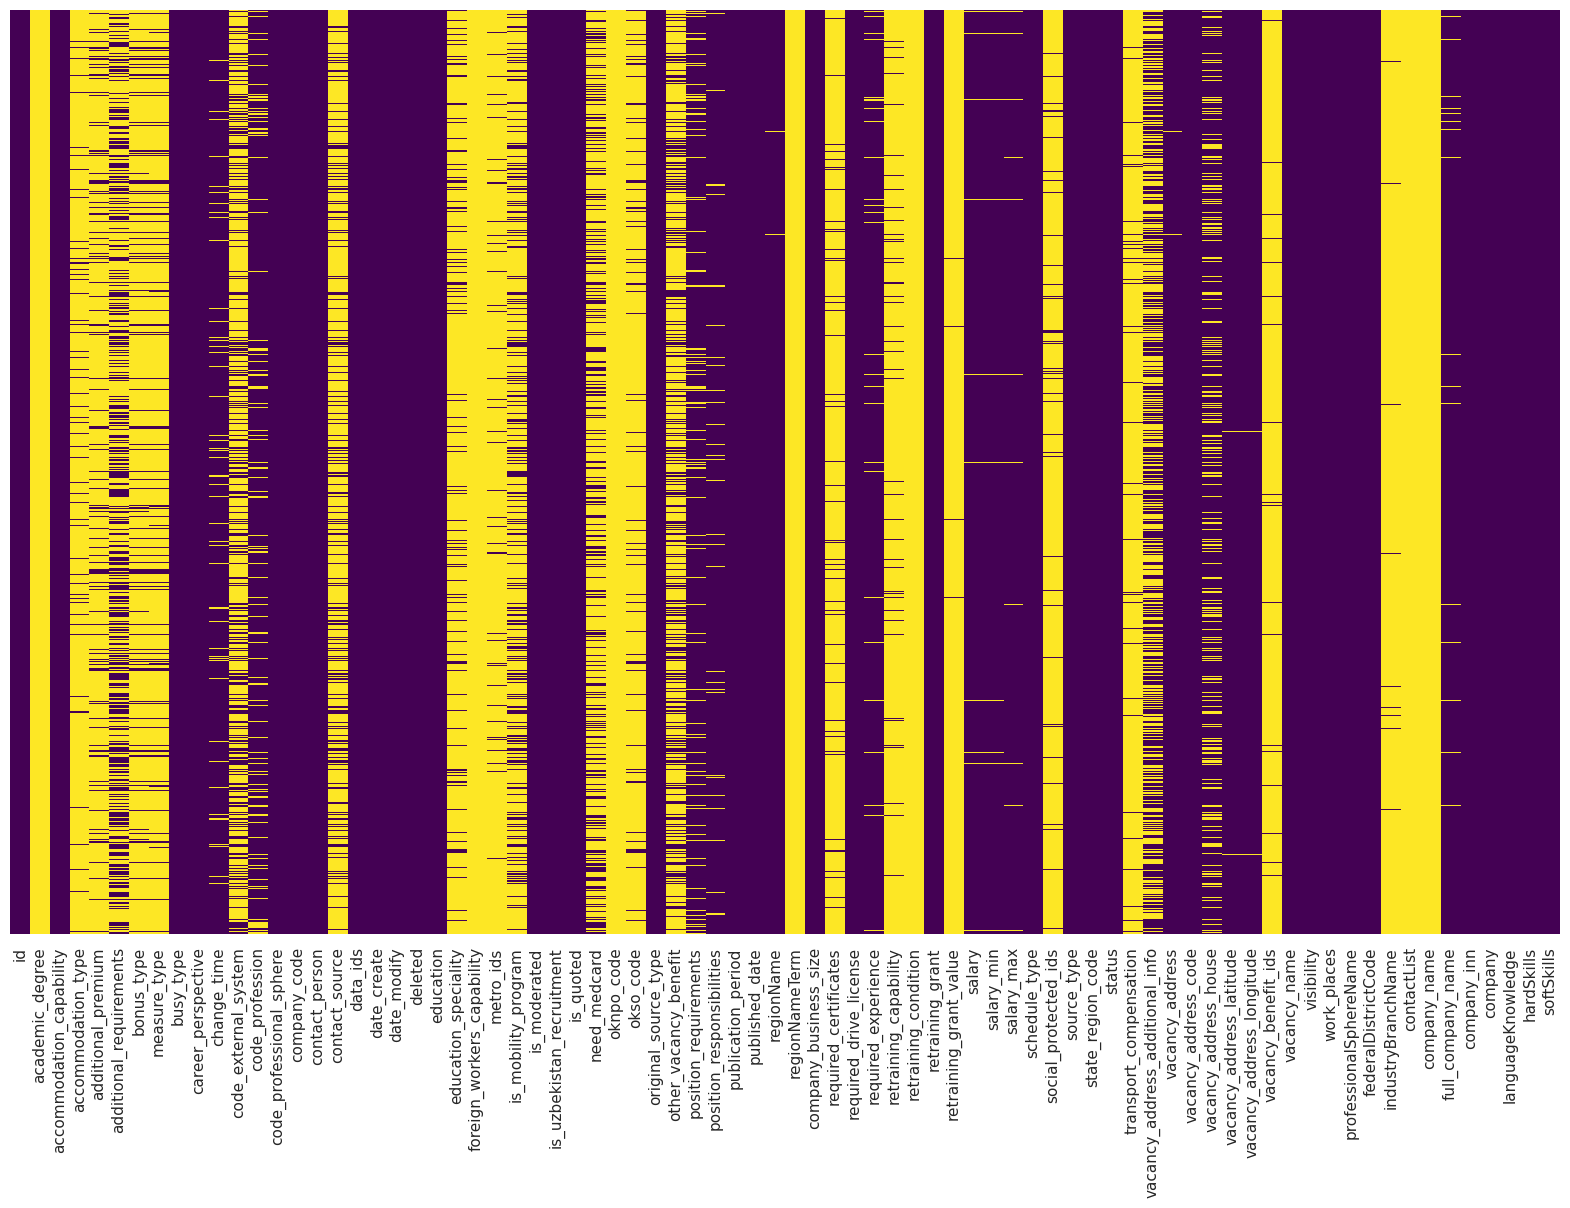

In [16]:
# Визуализация таблицы на пропуски
fig, ax = plt.subplots(figsize=(20,12)) # Создаем область под график
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis') # Визуализируем прпуски
plt.show() # Отображаем график

## Удаление столбцов

In [17]:
# Вычисляем порог для удаления столбцов
threshold = 0.5
threshold_value = int(threshold * len(df))

# Удаляем столбцы, в которых количество пропусков больше порогового значения
df = df.dropna(axis=1, thresh=threshold_value)

In [18]:
df.shape

(147469, 50)

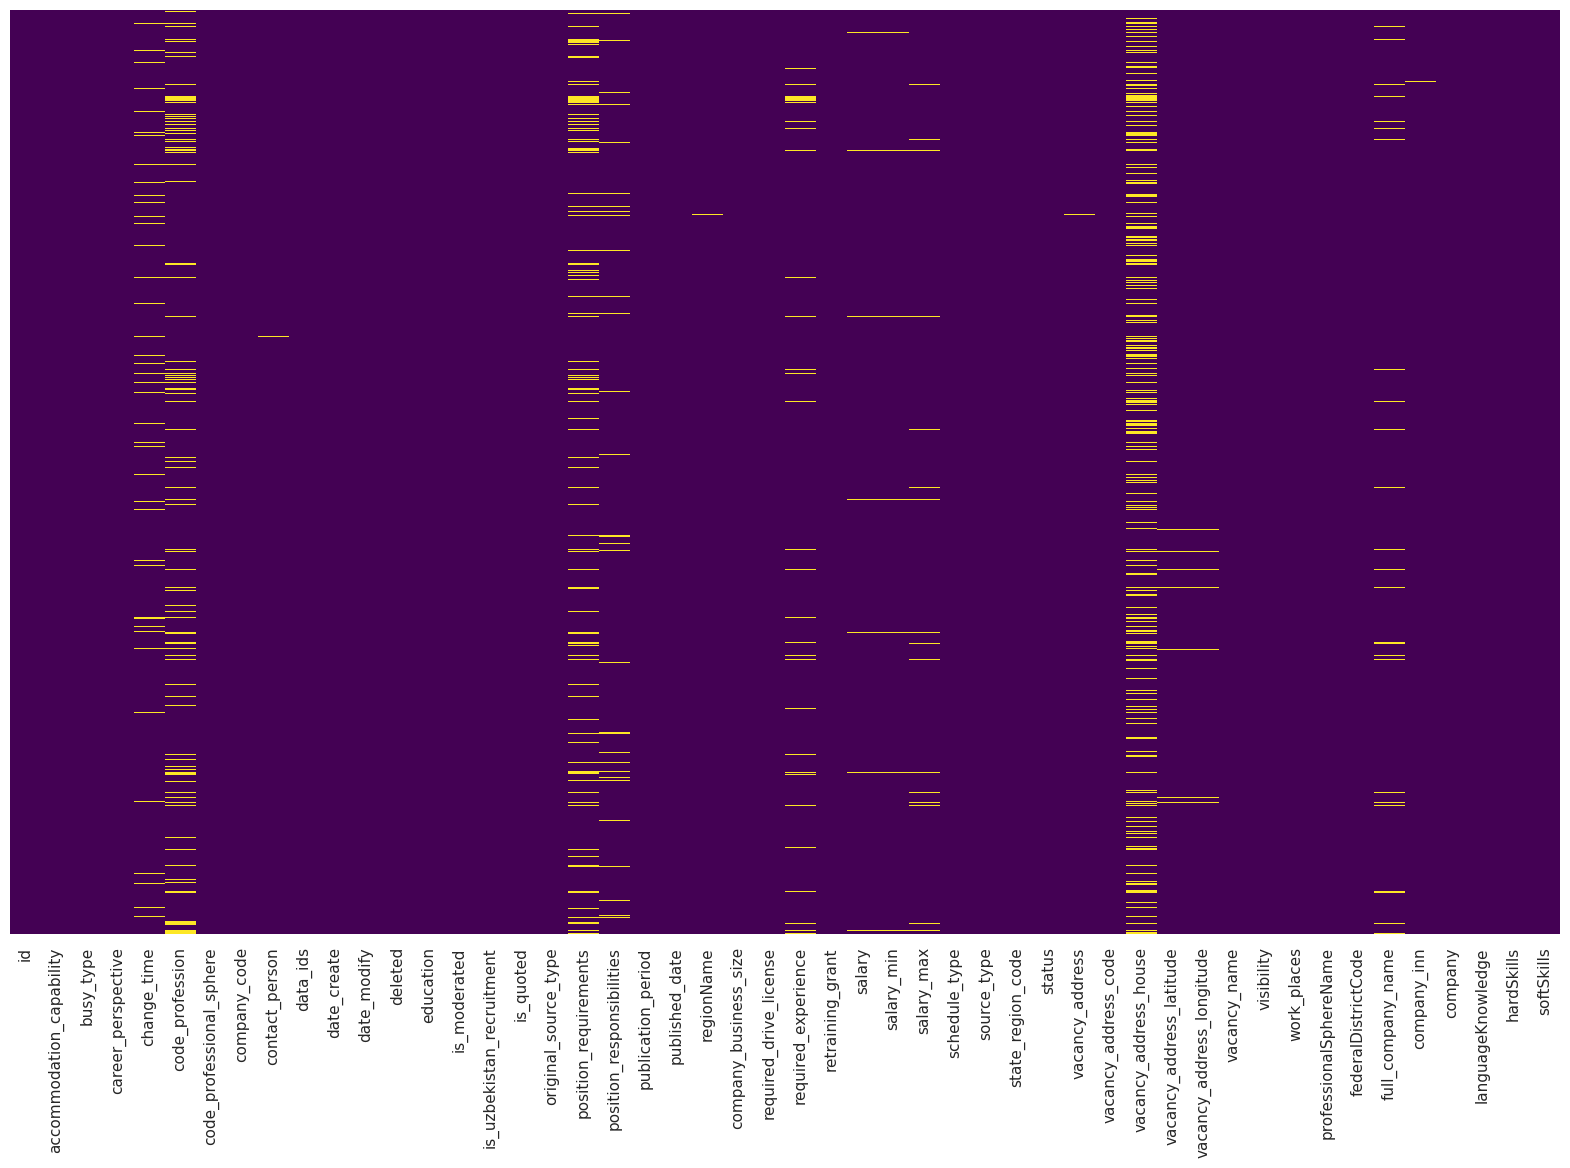

In [19]:
# Визуализация таблицы на пропуски
fig, ax = plt.subplots(figsize=(20,12)) # Создаем область под график
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis') # Визуализируем прпуски
plt.show() # Отображаем график

In [20]:
# Список столбцов которые оставлись
list_columns = list(df.columns)

In [21]:
list_columns

['id',
 'accommodation_capability',
 'busy_type',
 'career_perspective',
 'change_time',
 'code_profession',
 'code_professional_sphere',
 'company_code',
 'contact_person',
 'data_ids',
 'date_create',
 'date_modify',
 'deleted',
 'education',
 'is_moderated',
 'is_uzbekistan_recruitment',
 'is_quoted',
 'original_source_type',
 'position_requirements',
 'position_responsibilities',
 'publication_period',
 'published_date',
 'regionName',
 'company_business_size',
 'required_drive_license',
 'required_experience',
 'retraining_grant',
 'salary',
 'salary_min',
 'salary_max',
 'schedule_type',
 'source_type',
 'state_region_code',
 'status',
 'vacancy_address',
 'vacancy_address_code',
 'vacancy_address_house',
 'vacancy_address_latitude',
 'vacancy_address_longitude',
 'vacancy_name',
 'visibility',
 'work_places',
 'professionalSphereName',
 'federalDistrictCode',
 'full_company_name',
 'company_inn',
 'company',
 'languageKnowledge',
 'hardSkills',
 'softSkills']

In [22]:
'id'
'возможность размещения'
'тип занятости'
'перспектива карьеры'
'время изменения'
'код профессии'
'код профессиональной сферы'
'код компании'
'контактное лицо'
'идентификаторы данных'
'дата создания'
'дата изменения'
'удалено'
'образование'
'модерируется'
'узбекистан вербовка'
'цитируется'
'тип первоисточника'
'требования к должности'
'должностные обязанности'
'период публикации'
'дата публикации'
'регион Наименование '
'размер компании'
'требуемая лицензия на вождение'
'необходимый опыт'
'грант на переподготовку'
'зарплата'
'зарплата минимум'
'оклад макс'
'тип расписания'
'тип источника'
'код региона штата'
'статус'
'адрес вакансии'
'код адреса вакансии'
'адрес вакансии дом'
'адрес вакансии широта'
'адрес вакансии долгота'
'название вакансии'
'видимость'
'рабочие места'
'название профессиональной сферы'
'федеральный код округа'
'полное название компании '
'название компании'
'компания'
'знание языка'
'hardSkills'
'softSkills'

'softSkills'

In [23]:
# Пример первой строчки с общим кол-вом пропусков
n = 0
for column_name, value in df.iloc[100].items():
    print(f"{n} : {column_name} - {value}")
    n += 1

0 : id - 2ef57b02-8248-11ee-a2a9-3950de1bc4b3
1 : accommodation_capability - False
2 : busy_type - Полная занятость
3 : career_perspective - False
4 : change_time - 2023-11-13T20:15:03+0300
5 : code_profession - nan
6 : code_professional_sphere - Sales
7 : company_code - 1027700404797
8 : contact_person - Мария Лущенкова
9 : data_ids - ["2ef57b00-8248-11ee-a2a9-3950de1bc4b3","2ef57b01-8248-11ee-a2a9-3950de1bc4b3"]
10 : date_create - 2023-11-13T20:15:03+0300
11 : date_modify - 2023-11-13T20:15:03+0300
12 : deleted - False
13 : education - Не указано
14 : is_moderated - True
15 : is_uzbekistan_recruitment - False
16 : is_quoted - False
17 : original_source_type - INTERNET_RESOURCE
18 : position_requirements - nan
19 : position_responsibilities - <br/>Обязанности:<ul><li>Работа в торговом зале без кассы</li><li>Выкладка товара</li><li>Контроль сроков годности и ценников</li><li>Работа с покупателями</li></ul><br />Условия:<ul><li>Оформление по ТК РФ с первого дня</li><li>Полностью белая з

## Список не информативных столбцов

In [24]:
'id'
'возможность размещения'

'перспектива карьеры'
'время перемен'
'код профессии'

'код компании'
'контактное лицо'
'идентификаторы данных'
'дата создания'
'дата изменения'
'удалено'

'модерируется'
'узбекистан вербовка'
'цитируется'
'тип первоисточника'

'период публикации'
'дата публикации'

'размер компании'

'грант на переподготовку'

'тип расписания'
'тип источника'

'статус'

'код адреса вакансии'
'адрес вакансии дом'
'адрес вакансии широта'
'адрес вакансии долгота'

'видимость'
'транспортная компенсация'
'адрес вакансии дополнительная информация'

'адрес вакансии код'
'адрес вакансии дом'
'адрес вакансии широта'
'адрес вакансии долгота'
'идентификаторы вакансий'

'видимость'
'рабочие места'

'название компании'
'полное название компании'
'гостиница компании'
'компания'

'компания'

## Удаление неиформативных столбцов

In [25]:
# Список столбцов для удаления
columns_to_remove = ['id',
                      'accommodation_capability',
                      'career_perspective',
                      'change_time',
                      'code_profession',
                      'code_professional_sphere',
                      'company_code',
                      'contact_person',
                      'data_ids',
                      'date_create',
                      'date_modify',
                      'deleted',
                      'federalDistrictCode',
                      'is_moderated',
                      'is_uzbekistan_recruitment',
                      'is_quoted',
                      'original_source_type',
                      'publication_period',
                      'published_date',
                      'company_business_size',
                      'retraining_grant',
                      'status',
                      'vacancy_address_code',
                      'vacancy_address_house',
                      'vacancy_address_latitude',
                      'vacancy_address_longitude',
                      'source_type',
                      'salary',
                      'visibility',
                      'work_places',
                      'full_company_name',
                      'company_inn',
                      'company']


# Удаляем столбцы
df = df.drop(columns=columns_to_remove)

# Размер таблицы после удаления
print(df.shape)

(147469, 17)


In [26]:
df.head(10)

busy_type                 education  \
0  Полная занятость  Среднее профессиональное   
1  Полная занятость                    Высшее   
2  Полная занятость                   Среднее   
3  Полная занятость  Среднее профессиональное   
4  Полная занятость                    Высшее   
5  Полная занятость                    Высшее   
6  Полная занятость                Не указано   
7  Полная занятость                   Среднее   
8  Полная занятость                    Высшее   
9  Полная занятость                   Среднее   

                               position_requirements  \
0                      <p>Образование: фельдшер.</p>   
1  <ul> <li>Основы математической теории и перспе...   
2  <ul> <li>Опыт работы на производстве будет явл...   
3  Для трудоустройства инвалида 3 группы в соотве...   
4  <p><b>Юрисконсульт должен знать:</b></p> <p><!...   
5  Высшее педагогическое  образование, опыт работ...   
6      <p>Ответствекнность, дисциплинированность</p>   
7  Внимательность, пунктуальность, ответственност...   
8  <p>Не привлекавшиеся к уголовной ответственнос...   
9  <p>Водительское удостоверение категории С</p> ...   

                           position_responsibilities            regionName  \
0  <p>Работа с обращениями персонала, проведение ...     Калужская область   
1  <p></p> <ul> <li>Формирование конкретных знани...    Московская область   
2  <ul> <li>Выполнение операций согласно производ...    Московская область   
3  Знать рецептуру, технологию приготовления блюд...     Калужская область   
4  <p><b>Юрисконсульт должен обладать следующими ...    Московская область   
5  Проводит психопрофилактическую, диагностическу...  Белгородская область   
6  <p>1. Выполняет плотничьи работы в требуемом о...  Владимирская область   
7  Ведение процесса обработки тушек птицы, обслуж...   Костромская область   
8  <p>Обеспечение исправления спецконтингента</p>...  Владимирская область   
9  <p>Обеспечение целостной и своевременной перев...      Тульская область   

  required_drive_license  required_experience  salary_min  salary_max  \
0                     []                5.000   27000.000   27000.000   
1                     []                0.000   40000.000   60000.000   
2                     []                1.000   58000.000   78000.000   
3                     []                1.000   16250.000       0.000   
4                     []                2.000   40000.000   50000.000   
5                     []                0.000   20000.000       0.000   
6                     []                0.000   45000.000       0.000   
7                     []                0.000   40000.000       0.000   
8                     []                0.000   35000.000   45000.000   
9                     []                0.000   30000.000       0.000   

         schedule_type  state_region_code  \
0  Полный рабочий день      4000000000000   
1  Полный рабочий день      5000000000000   
2  Полный рабочий день      5000000000000   
3  Полный рабочий день      4000000000000   
4  Полный рабочий день      5000000000000   
5       Сменный график      3100000000000   
6  Полный рабочий день      3300000000000   
7  Полный рабочий день      4400000000000   
8       Сменный график      3300000000000   
9  Полный рабочий день      7100000000000   

                                     vacancy_address  \
0  Калужская область, Бабынинский район, Воротынс...   
1  Московская область, Город Серпухов, Липицы сел...   
2  Московская область, Город Мытищи, Проектируемы...   
3  Калужская область, Город Калуга, Воронина улиц...   
4  Московская область, Город Жуковский, Фрунзе ул...   
5                               Белгородская область   
6  Владимирская область, Ковровский район, Первом...   
7                                Костромская область   
8  Владимирская область, Вязниковский район, Горо...   
9  Тульская область, Город Тула, Менделеевский по...   

                      vacancy_name  \
0                         Фельдшер   
1

## Дальнейший анализ для удаления столбцов

In [27]:
# Тоже не иноормативный столбец
# df['source_type'].unique()

In [28]:
# Данный столбец повторяет - professionalSphereName
# df['code_professional_sphere'].unique()

In [29]:
# Удалить повторный столбец
# df['salary'].unique()

**Вопрос. Надо ли удалять salary_max ?**

# **Корреляция данных**

## Посмотрим на разные графики корреляции

In [30]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

required_experience  salary_min  salary_max  \
required_experience                1.000       0.242       0.147   
salary_min                         0.242       1.000       0.548   
salary_max                         0.147       0.548       1.000   
state_region_code                  0.108       0.197       0.176   

                     state_region_code  
required_experience              0.108  
salary_min                       0.197  
salary_max                       0.176  
state_region_code                1.000

### Визуализация графика корреляции

<AxesSubplot:>

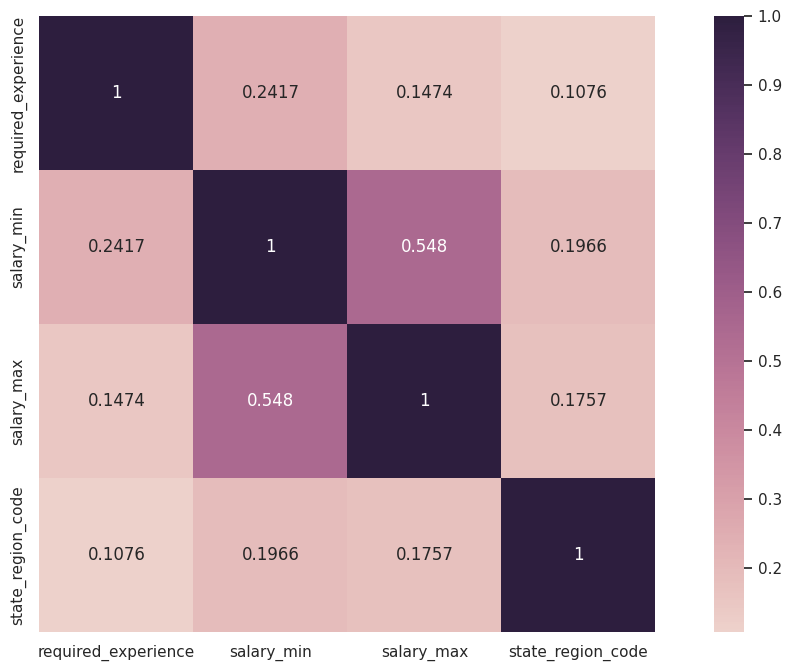

In [31]:
plt.subplots(figsize=(15,8))
fig=sns.heatmap(corr_matrix, annot=True, square=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='.4g')
fig

In [32]:
corr_matrix.style.background_gradient(cmap='coolwarm')

## **Графики**

### **Общие основные графики**

array([[<AxesSubplot:title={'center':'required_experience'}>,
        <AxesSubplot:title={'center':'salary_min'}>],
       [<AxesSubplot:title={'center':'salary_max'}>,
        <AxesSubplot:title={'center':'state_region_code'}>]], dtype=object)

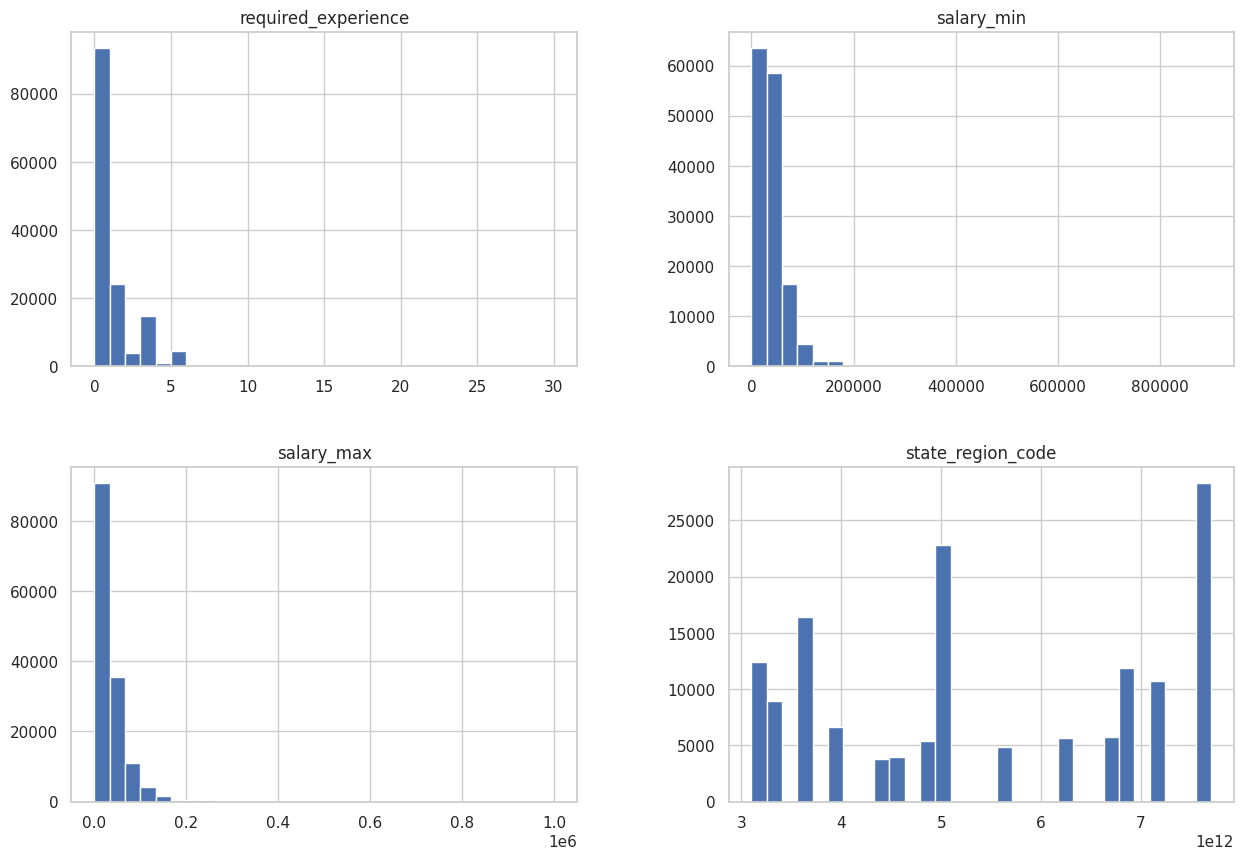

In [33]:
df.hist(bins=30, figsize=(15, 10))

In [34]:
# Столбец federalDistrictCode тоже не информативный, там все значения 1
# df['federalDistrictCode'].value_counts

# **Разбор каждого столбца**

In [35]:
df.sample(3)

busy_type education  \
42475   Полная занятость    Высшее   
84950   Полная занятость   Среднее   
143226  Полная занятость    Высшее   

                                    position_requirements  \
42475   <ul> <li> <p>Высшее образование</p> </li> <li>...   
84950   Стаж работы, наличие водительского удостоверен...   
143226  <p>хорошее владение компьютером;</p> <p>умение...   

                                position_responsibilities          regionName  \
42475   <ul> <li> <p>оказание помощи ГИПу по вопросам,...  Смоленская область   
84950   Водитель обязан:  - управлять автомобилем, под...     Курская область   
143226  <p>- участвует в подготовке новых и возобновля...  Московская область   

       required_drive_license  required_experience  salary_min  salary_max  \
42475                      []                5.000   30000.000   35000.000   
84950                      []                0.000   50000.000   68000.000   
143226                     []                1.000   33152.000   48000.000   

              schedule_type  state_region_code  \
42475   Полный рабочий день      6700000000000   
84950   Полный рабочий день      4600000000000   
143226  Полный рабочий день      5000000000000   

                                          vacancy_address  \
42475   Смоленская область, Город Смоленск, Кирова ули...   
84950                                     Курская область   
143226  Московская область, Город Волоколамск, Советск...   

                               vacancy_name  \
42475   Помощник главного инженера проектов   
84950                   Водитель автомобиля   
143226                        Звукорежиссер   

                                   professionalSphereName languageKnowledge  \
42475   Строительство, ремонт, стройматериалы, недвижи...                []   
84950        Транспорт, автобизнес, логистика, склад, ВЭД                []   
143226                  Искусство, культура и развлечения                []   

                                               hardSkills  \
42475   [{"hard_skill_name":"знание нормативной докуме...   
84950                                                  []   
143226  [{"hard_skill_name":"работа в режиме многозада...   

                                               softSkills  
42475                                                  []  
84950                                                  []  
143226  [{"owner_id":"adafe459-69a5-11ee-ac0f-e7d0d2cf...

## 1. **Вакансии** - vacancy_name

In [36]:
df.head(1)

busy_type                 education          position_requirements  \
0  Полная занятость  Среднее профессиональное  <p>Образование: фельдшер.</p>   

                           position_responsibilities         regionName  \
0  <p>Работа с обращениями персонала, проведение ...  Калужская область   

  required_drive_license  required_experience  salary_min  salary_max  \
0                     []                5.000   27000.000   27000.000   

         schedule_type  state_region_code  \
0  Полный рабочий день      4000000000000   

                                     vacancy_address vacancy_name  \
0  Калужская область, Бабынинский район, Воротынс...     Фельдшер   

                     professionalSphereName languageKnowledge hardSkills  \
0  Здравоохранение и социальное обеспечение                []         []   

  softSkills  
0         []

In [37]:
df['vacancy_name'].describe()

count                                             147463
unique                                             40276
top       Уборщик производственных и служебных помещений
freq                                                1456
Name: vacancy_name, dtype: object

40277 - уникальных вакансий

In [38]:
df['vacancy_name'].value_counts()

Уборщик производственных и служебных помещений    1456
Повар                                             1445
Водитель автомобиля                               1266
Продавец-кассир                                   1185
Подсобный рабочий                                 1138
                                                  ... 
водитель автомобиля специально                       1
Бригадир смены грузчиков-комплектовщиков             1
раскройщик ирс 2023                                  1
Ветеринарный врач (Гагаринский филиал)               1
подсобный рабочий (5)                                1
Name: vacancy_name, Length: 40276, dtype: int64

### 30 самых популярный вакансий

In [39]:
# Посмотрим на 30 самых популярный вакансий
top30_profs = df['vacancy_name'].value_counts(dropna=False).nlargest(30)
top30_profs

Уборщик производственных и служебных помещений                  1456
Повар                                                           1445
Водитель автомобиля                                             1266
Продавец-кассир                                                 1185
Подсобный рабочий                                               1138
Дворник                                                         1092
Грузчик                                                         1078
Бухгалтер                                                       1052
Медицинская сестра                                               897
Швея                                                             866
Полицейский / Полицейский-водитель                               827
Кладовщик                                                        756
Электромонтер по ремонту и обслуживанию электрооборудования      651
Слесарь-ремонтник                                                641
Электрогазосварщик                

### Вакансии по **регионам**

In [40]:
df.groupby('regionName', as_index=False).busy_type.count()

regionName  busy_type
0            Белгородская область       6930
1   Боровлево-1 промышленная зона          5
2   Боровлево-2 промышленная зона          8
3                Брянская область       5505
4            Владимирская область       8956
5             Воронежская область       9777
6                    Город Москва      20409
7              Ивановская область       6621
8               Калужская область       6668
9             Костромская область       3753
10                Курская область       4008
11               Липецкая область       5380
12             Московская область      22742
13              Орловская область       4814
14              Рязанская область       5674
15             Смоленская область       5697
16             Тамбовская область       4724
17               Тверская область       7091
18               Тульская область      10687
19            Ярославская область       7931
20                      г. Москва          4

### **Визуализация данных по вакансиям**

In [41]:
!python -m spacy download ru_core_news_sm &>/dev/null

In [42]:
import spacy
from tqdm import tqdm
from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import Counter

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
nlp = spacy.load("ru_core_news_sm")
russian_stopwords = stopwords.words('russian')

In [ ]:
custom_position_lemmas = []
for i in tqdm(df['vacancy_name']):
    doc = nlp(str(i))
    lemmas = [token.lemma_ for token in doc if (token.text.isalpha() and token.text not in russian_stopwords)]
    custom_position_lemmas.extend(lemmas)

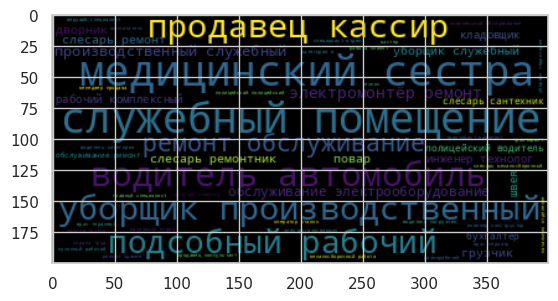

In [ ]:
wordcloud = WordCloud(stopwords=russian_stopwords).generate(' '.join(custom_position_lemmas))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [ ]:
c = Counter(custom_position_lemmas)
common_positions = dict(c.most_common(5))
common_positions_names = list(common_positions.keys())
common_positions_count = list(common_positions.values())

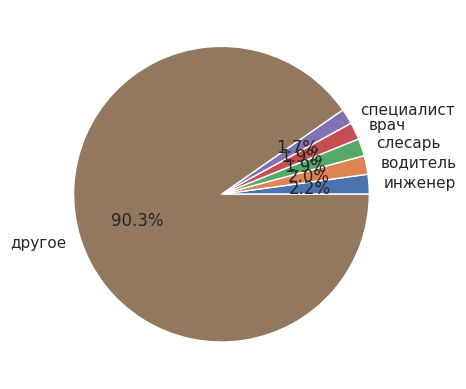

In [ ]:
plt.pie(common_positions_count + [len(custom_position_lemmas) - sum(common_positions_count)],
        labels=common_positions_names + ['другое'],
        autopct='%1.1f%%')
plt.show()

## 2. **Зарплата** - salary_min

In [45]:
df.head(1)

busy_type                 education          position_requirements  \
0  Полная занятость  Среднее профессиональное  <p>Образование: фельдшер.</p>   

                           position_responsibilities         regionName  \
0  <p>Работа с обращениями персонала, проведение ...  Калужская область   

  required_drive_license  required_experience  salary_min  salary_max  \
0                     []                5.000   27000.000   27000.000   

         schedule_type  state_region_code  \
0  Полный рабочий день      4000000000000   

                                     vacancy_address vacancy_name  \
0  Калужская область, Бабынинский район, Воротынс...     Фельдшер   

                     professionalSphereName languageKnowledge hardSkills  \
0  Здравоохранение и социальное обеспечение                []         []   

  softSkills  
0         []

In [46]:
# Распределение зарплаты от
print(df['salary_min'].describe())


count   145598.000
mean     37947.252
std      26526.035
min          0.000
25%      20000.000
50%      30400.000
75%      49300.000
max     900000.000
Name: salary_min, dtype: float64


In [47]:
# Распределение зарплаты до
print(df['salary_max'].describe())

count    144443.000
mean      29908.062
std       37708.678
min           0.000
25%           0.000
50%       21711.000
75%       45000.000
max     1000000.000
Name: salary_max, dtype: float64


In [48]:
# Подсчитаем разницу в зарплате от и до
df['salary_diff'] = df['salary_min'] - df['salary_max']

In [49]:
# Самые большие зарплаты от
df[['vacancy_name','salary_min']].sort_values(by='salary_min', ascending=False).head(20)

vacancy_name  salary_min
4167                                     Начальник охраны  900000.000
144253              Директор по клиентскому опыту и медиа  558000.000
14133                        Директор по развитию (74062)  539999.000
76006                                  Машинист конвейера  539000.000
19787                                      Программист 1С  504000.000
77540   Начальник управления продуктов эквайринговых с...  500000.000
105137                                       Врач-онколог  450000.000
48552                                      вице-президент  420000.000
105413  Врач-офтальмохирург (катарактальный и витреоре...  400000.000
76411            начальник управления по импортозамещению  400000.000
124950                    Советник генерального директора  366000.000
33315   Руководитель отдела по работе с поставщиками и...  360000.000
145851                               Оператор call-центра  358000.000
13784               Заместитель начальника отдела (82318)  346190.000
139866  Ведущий инженер по надзору за строительством (...  344680.000
48243   Главный специалист по информационной безопасности  340000.000
108991                                 Проектный менеджер  324875.000
139547  Ведущий инженер по комплектации оборудования и...  321702.000
12584          Сборщик квадрокоптеров еженедельная оплата  320000.000
121414                                           Водитель  315000.000

In [50]:
# Самые большие зарплаты с учетом разницы от и до
df[['vacancy_name','salary_diff']].sort_values(by='salary_diff', ascending=False).head(20)

vacancy_name  salary_diff
14133                        Директор по развитию (74062)   539999.000
76006                                  Машинист конвейера   539000.000
105137                                       Врач-онколог   450000.000
76411            начальник управления по импортозамещению   400000.000
13784               Заместитель начальника отдела (82318)   346190.000
139866  Ведущий инженер по надзору за строительством (...   344680.000
48243   Главный специалист по информационной безопасности   340000.000
139547  Ведущий инженер по комплектации оборудования и...   321702.000
127847  Руководитель проектов по разработке инвестицио...   313000.000
127669        Руководитель направления внутреннего аудита   308900.000
145475            Ведущий инженер по планированию (73346)   304468.000
115456                                            Адвокат   300000.000
85912           Арт-директор команды продуктового дизайна   300000.000
21600                                Начальник отдела АСУ   300000.000
139435  Эксперт по проектированию технологических объе...   299000.000
140346       Инженер по надзору за строительством (73349)   290680.000
26509                                    Аналитик (79857)   280400.000
75541                               Категорийный директор   250000.000
101926                              Коммерческий директор   250000.000
142781                                        Программист   250000.000

### Зарплата по ТОП 30 професиям

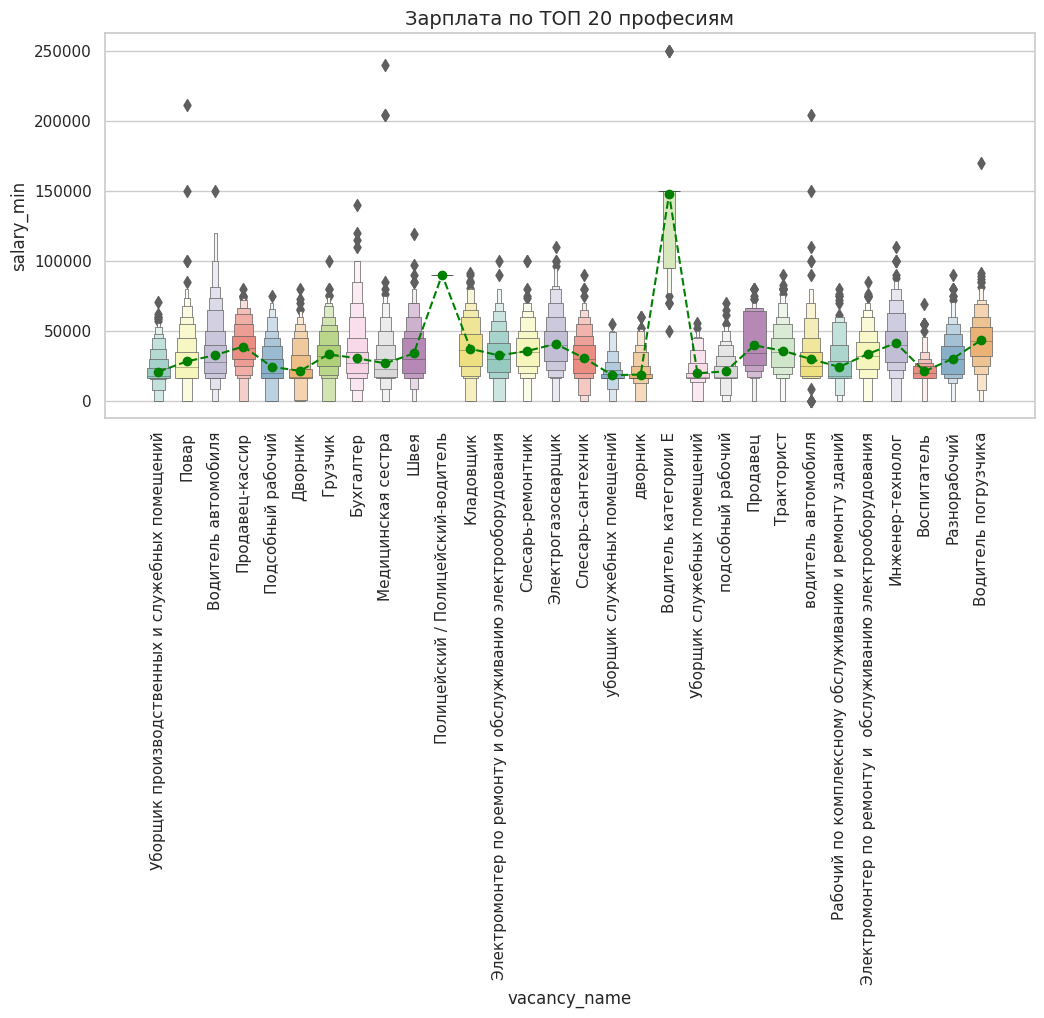

In [51]:
_df = df[df['vacancy_name'].isin(top30_profs.index)]
profession_ranking = list(top30_profs.index)

f, ax = plt.subplots(figsize=(12,5))
ax = sns.boxenplot(x="vacancy_name", y="salary_min",
              color="gray",  palette="Set3", order=profession_ranking,
              scale="linear", data=_df, linewidth=0.5)

ax.tick_params(axis='x', rotation=90)
ax.set_title("Зарплата по ТОП 20 професиям", fontsize=14)

means = _df.groupby("vacancy_name")["salary_min"].mean().loc[profession_ranking]
_ = plt.plot(range(len(profession_ranking)), means, marker="o", color="green", markersize=6, linestyle="--")

### **Средняя зарплата по городам**


г. Москва: 75000
Город Москва: 63910
Боровлево-1 промышленная зона: 58600
Московская область: 51119
Боровлево-2 промышленная зона: 50625
Тульская область: 35054
Калужская область: 33825
Владимирская область: 32935
Липецкая область: 32184
Белгородская область: 32037

Топ-10 регионов с самыми маленькими зарплатами:
Рязанская область: 30221
Воронежская область: 29770
Ярославская область: 29591
Курская область: 29174
Брянская область: 28044
Костромская область: 27905
Смоленская область: 27068
Орловская область: 26818
Ивановская область: 26548
Тамбовская область: 24584


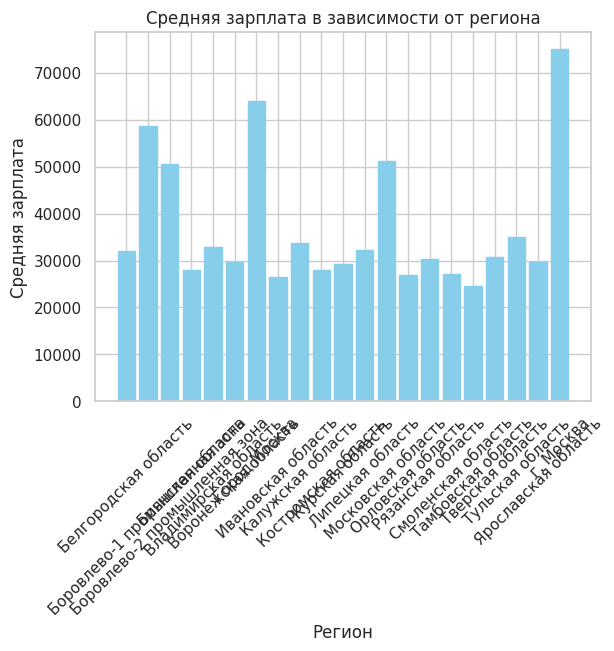

In [52]:
grouped_df = df.groupby('regionName')['salary_min'].mean()

# Выводим топ-10 городов с самыми большими зарплатами
for region_id, avg_salary in grouped_df.sort_values(ascending=False).head(10).items():
    print(f"{region_id}: {round(avg_salary)}")

# Выводим топ-10 городов с самыми маленькими зарплатами
print("\nТоп-10 регионов с самыми маленькими зарплатами:")
for region_id, avg_salary in grouped_df.sort_values(ascending=False).tail(10).items():
    print(f"{region_id}: {round(avg_salary)}")

# Построение графика
plt.bar(grouped_df.index, grouped_df.values, color = 'skyblue', edgecolor = 'skyblue', linewidth=1)
plt.xlabel('Регион')
plt.ylabel('Средняя зарплата')
plt.title('Средняя зарплата в зависимости от региона')
plt.xticks(rotation=90)
plt.show()

### **Взамосвязи между столбцами**

#### График работы и зарплатой

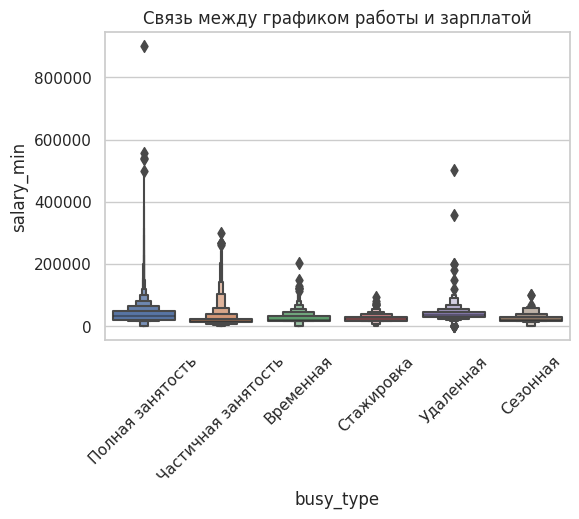

In [53]:
plt.figure(figsize=(6, 4))
sns.boxenplot(x='busy_type', y='salary_min', data=df)
plt.title('Связь между графиком работы и зарплатой')
plt.xticks(rotation=45)
plt.show()

#### Распределение **заработной платы** от и до

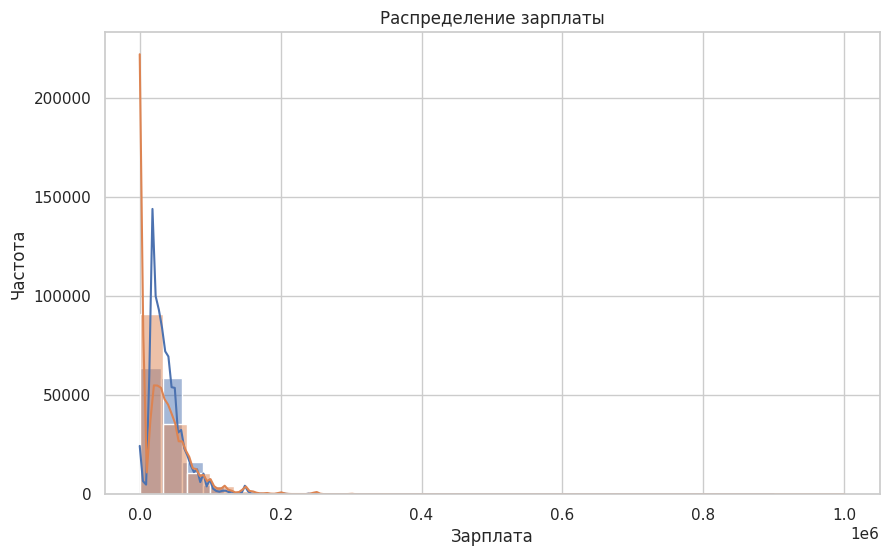

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_min'], bins=30, kde=True)
sns.histplot(df['salary_max'], bins=30, kde=True)
plt.title('Распределение зарплаты')
plt.xlabel('Зарплата')
plt.ylabel('Частота')
plt.show()

### **Вывод:**

Одни из самых высоких зарплат характерны для типа занятости "Полная занятость".

## 3. **Тип занятости** - busy_type и schedule_type

In [55]:
df.sample(3)

busy_type                 education  \
126577  Частичная занятость                Не указано   
120128     Полная занятость                Не указано   
105476     Полная занятость  Среднее профессиональное   

                                    position_requirements  \
126577                <p>специальных требований- нет.</p>   
120128                           <p>При собеседовании</p>   
105476  <p><!-- [if !supportLists]-->-&nbsp;&nbsp;&nbs...   

                                position_responsibilities  \
126577  <p></p> <p>1. Осуществляет ежедневную уборку: ...   
120128   <p>Ремонт и обслуживание электрооборудования</p>   
105476  <p><!-- [if !supportLists]-->-&nbsp;&nbsp;&nbs...   

                 regionName required_drive_license  required_experience  \
126577     Липецкая область                     []                0.000   
120128   Смоленская область                     []                0.000   
105476  Воронежская область                     []                1.000   

        salary_min  salary_max          schedule_type  state_region_code  \
126577   10000.000   10000.000  Неполный рабочий день      4800000000000   
120128   18000.000       0.000    Полный рабочий день      6700000000000   
105476   36000.000   36000.000    Полный рабочий день      3600000000000   

                                          vacancy_address  \
126577  Липецкая область, Задонский район, Город Задон...   
120128  Смоленская область, Рославльский район, Петров...   
105476  Воронежская область, Богучарский район, Город ...   

                                             vacancy_name  \
126577                 уборщик производственных помещений   
120128  Электромонтер по ремонту и  обслуживанию элект...   
105476  Ведущий менеджер-операционист дополнительного ...   

                                   professionalSphereName languageKnowledge  \
126577              Продажи, закупки, снабжение, торговля                []   
120128                             Пищевая промышленность                []   
105476  Банки, кредит, страхование, пенсионное обеспеч...                []   

                                               hardSkills  \
126577                                                 []   
120128                                                 []   
105476  [{"hard_skill_name":"выполнение планов продаж"...   

                                               softSkills  salary_diff  
126577                                                 []        0.000  
120128                                                 []    18000.000  
105476  [{"owner_id":"34ba8559-8d3b-11ee-8cd7-bb4c34bd...        0.000

In [56]:
df['busy_type'].value_counts()

Полная занятость       139096
Частичная занятость      3670
Временная                3432
Удаленная                 494
Стажировка                436
Сезонная                  341
Name: busy_type, dtype: int64

In [57]:
df['schedule_type'].value_counts()

Полный рабочий день             103120
Сменный график                   30514
Неполный рабочий день             5912
Гибкий график                     3324
Вахтовый метод                    2823
Ненормированный рабочий день      1776
Name: schedule_type, dtype: int64

### Графики

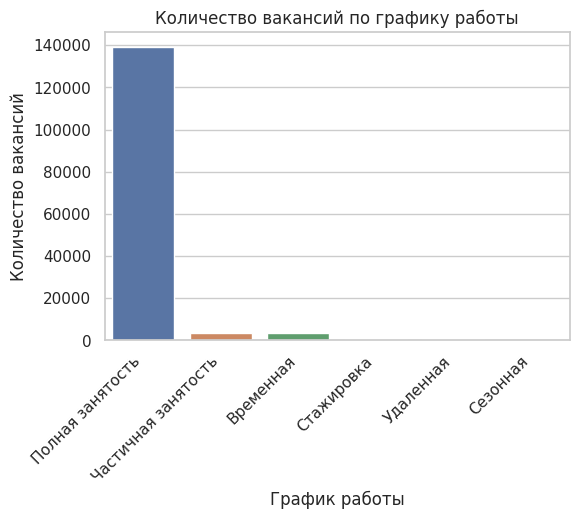

In [58]:
plt.figure(figsize=(6, 4))
sns.countplot(x='busy_type', data=df)
plt.title('Количество вакансий по графику работы')
plt.xlabel('График работы')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45, ha='right')
plt.show()

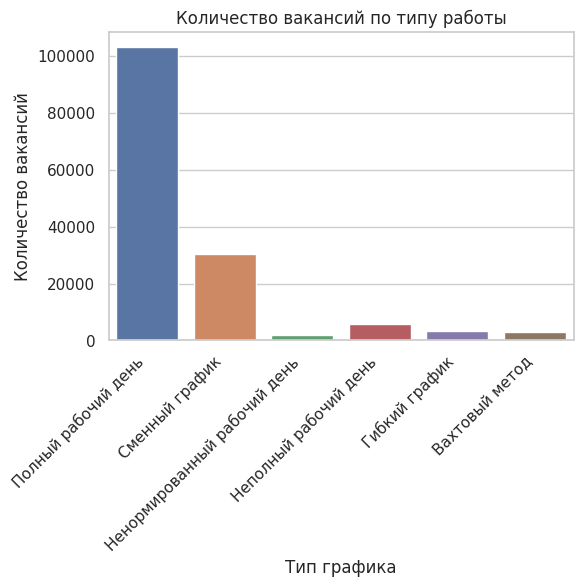

In [59]:
plt.figure(figsize=(6, 4))
sns.countplot(x='schedule_type', data=df)
plt.title('Количество вакансий по типу работы')
plt.xlabel('Тип графика')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45, ha='right')
plt.show()

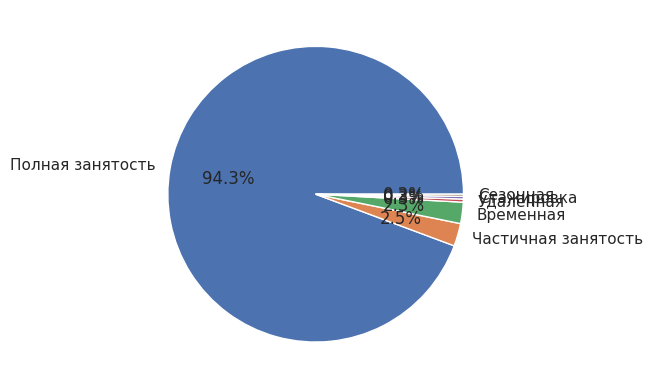

In [60]:
schedule_value_counts = df['busy_type'].value_counts()
plt.pie(schedule_value_counts, labels=schedule_value_counts.index, autopct='%1.1f%%')
plt.show()

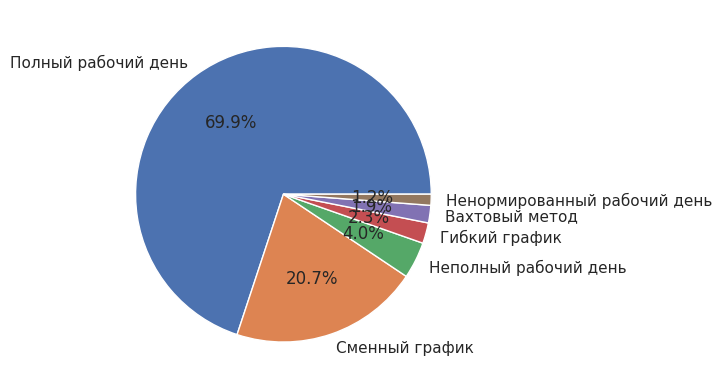

In [61]:
schedule_value_counts = df['schedule_type'].value_counts()
plt.pie(schedule_value_counts, labels=schedule_value_counts.index, autopct='%1.1f%%')
plt.show()

### **Вывод:**
 - Больше всего вакансий с полным рабочим днем. На втором месте - сменный график.

## 4. **Уровень образования** - education

In [62]:
df.head(3)

busy_type                 education  \
0  Полная занятость  Среднее профессиональное   
1  Полная занятость                    Высшее   
2  Полная занятость                   Среднее   

                               position_requirements  \
0                      <p>Образование: фельдшер.</p>   
1  <ul> <li>Основы математической теории и перспе...   
2  <ul> <li>Опыт работы на производстве будет явл...   

                           position_responsibilities          regionName  \
0  <p>Работа с обращениями персонала, проведение ...   Калужская область   
1  <p></p> <ul> <li>Формирование конкретных знани...  Московская область   
2  <ul> <li>Выполнение операций согласно производ...  Московская область   

  required_drive_license  required_experience  salary_min  salary_max  \
0                     []                5.000   27000.000   27000.000   
1                     []                0.000   40000.000   60000.000   
2                     []                1.000   58000.000   78000.000   

         schedule_type  state_region_code  \
0  Полный рабочий день      4000000000000   
1  Полный рабочий день      5000000000000   
2  Полный рабочий день      5000000000000   

                                     vacancy_address  \
0  Калужская область, Бабынинский район, Воротынс...   
1  Московская область, Город Серпухов, Липицы сел...   
2  Московская область, Город Мытищи, Проектируемы...   

                      vacancy_name                    professionalSphereName  \
0                         Фельдшер  Здравоохранение и социальное обеспечение   
1                          Учитель                        Образование, наука   
2  Оператор производственной линии                              Производство   

  languageKnowledge hardSkills softSkills  salary_diff  
0                []         []         []        0.000  
1                []         []         []   -20000.000  
2                []         []         []   -20000.000

In [63]:
df['education'].value_counts()

Не указано                  58327
Среднее профессиональное    38861
Высшее                      30584
Среднее                     18773
Среднее общее                 503
Незаконченное высшее          215
Основное общее                206
Name: education, dtype: int64

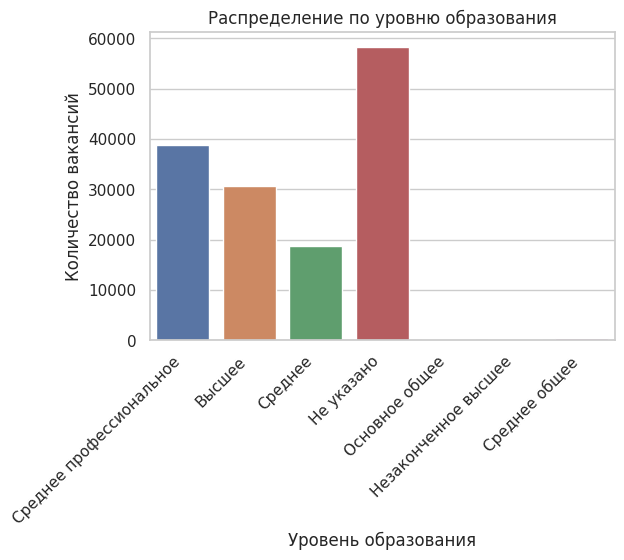

In [64]:
plt.figure(figsize=(6, 4))
sns.countplot(x='education', data=df)
plt.title('Распределение по уровню образования')
plt.xlabel('Уровень образования')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45, ha='right')
plt.show()

### **Вывод:**
Как видно большинству вакансий подходит любой уровень образования.



### Связь между образованием и зарплатой

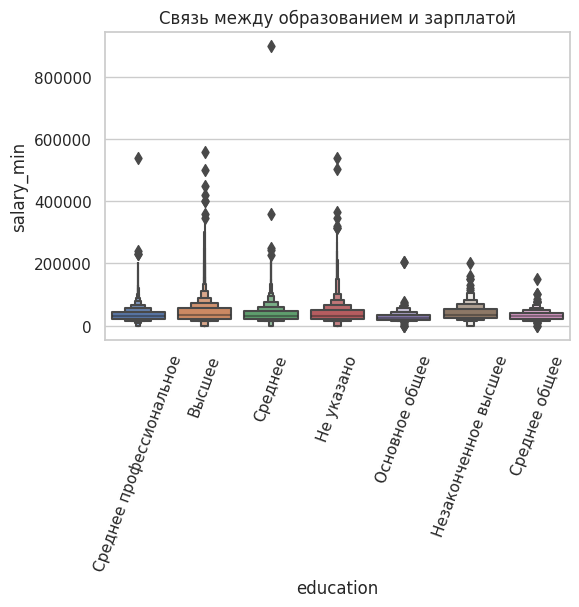

In [65]:
plt.figure(figsize=(6, 4))
sns.boxenplot(x='education', y='salary_min', data=df)
plt.title('Связь между образованием и зарплатой')
plt.xticks(rotation=70)
plt.show()

# 5. **Регионы** - regionName

In [66]:
df.head(5)

busy_type                 education  \
0  Полная занятость  Среднее профессиональное   
1  Полная занятость                    Высшее   
2  Полная занятость                   Среднее   
3  Полная занятость  Среднее профессиональное   
4  Полная занятость                    Высшее   

                               position_requirements  \
0                      <p>Образование: фельдшер.</p>   
1  <ul> <li>Основы математической теории и перспе...   
2  <ul> <li>Опыт работы на производстве будет явл...   
3  Для трудоустройства инвалида 3 группы в соотве...   
4  <p><b>Юрисконсульт должен знать:</b></p> <p><!...   

                           position_responsibilities          regionName  \
0  <p>Работа с обращениями персонала, проведение ...   Калужская область   
1  <p></p> <ul> <li>Формирование конкретных знани...  Московская область   
2  <ul> <li>Выполнение операций согласно производ...  Московская область   
3  Знать рецептуру, технологию приготовления блюд...   Калужская область   
4  <p><b>Юрисконсульт должен обладать следующими ...  Московская область   

  required_drive_license  required_experience  salary_min  salary_max  \
0                     []                5.000   27000.000   27000.000   
1                     []                0.000   40000.000   60000.000   
2                     []                1.000   58000.000   78000.000   
3                     []                1.000   16250.000       0.000   
4                     []                2.000   40000.000   50000.000   

         schedule_type  state_region_code  \
0  Полный рабочий день      4000000000000   
1  Полный рабочий день      5000000000000   
2  Полный рабочий день      5000000000000   
3  Полный рабочий день      4000000000000   
4  Полный рабочий день      5000000000000   

                                     vacancy_address  \
0  Калужская область, Бабынинский район, Воротынс...   
1  Московская область, Город Серпухов, Липицы сел...   
2  Московская область, Город Мытищи, Проектируемы...   
3  Калужская область, Город Калуга, Воронина улиц...   
4  Московская область, Город Жуковский, Фрунзе ул...   

                      vacancy_name  \
0                         Фельдшер   
1                          Учитель   
2  Оператор производственной линии   
3                            Повар   
4       Специалист в сфере закупок   

                              professionalSphereName languageKnowledge  \
0           Здравоохранение и социальное обеспечение                []   
1                                 Образование, наука                []   
2                                       Производство                []   
3                             Пищевая промышленность                []   
4  Государственная служба, некоммерческие организ...                []   

  hardSkills softSkills  salary_diff  
0         []         []        0.000  
1         []         []   -20000.000  
2         []         []   -20000.000  
3         []         []    16250.000  
4         []         []   -10000.000

In [67]:
region_counts = df['regionName'].value_counts()
print(region_counts)

Московская область               22742
Город Москва                     20409
Тульская область                 10687
Воронежская область               9777
Владимирская область              8956
Ярославская область               7931
Тверская область                  7091
Белгородская область              6930
Калужская область                 6668
Ивановская область                6621
Смоленская область                5697
Рязанская область                 5674
Брянская область                  5505
Липецкая область                  5380
Орловская область                 4814
Тамбовская область                4724
Курская область                   4008
Костромская область               3753
Боровлево-2 промышленная зона        8
Боровлево-1 промышленная зона        5
г. Москва                            4
Name: regionName, dtype: int64


### Количество уникальных регионов

In [68]:
print(f'Количество уникальных регионов: {len(df["regionName"].unique())}')

Количество уникальных регионов: 22


In [69]:
# Определяем порог для подписей (0.5% от общего количества)
threshold = 0.005 * len(df)

# Отбираем только те значения, где количество больше порога
annotated_region_ids = region_counts[region_counts > threshold].index

filtered_data = df[df['regionName'].isin(annotated_region_ids)]

print(f'Процент данных, который занимают следующие регионы: {list(annotated_region_ids)} равен {round(len(filtered_data)/len(df)*100)}%')

Процент данных, который занимают следующие регионы: ['Московская область', 'Город Москва', 'Тульская область', 'Воронежская область', 'Владимирская область', 'Ярославская область', 'Тверская область', 'Белгородская область', 'Калужская область', 'Ивановская область', 'Смоленская область', 'Рязанская область', 'Брянская область', 'Липецкая область', 'Орловская область', 'Тамбовская область', 'Курская область', 'Костромская область'] равен 100%


### **График**

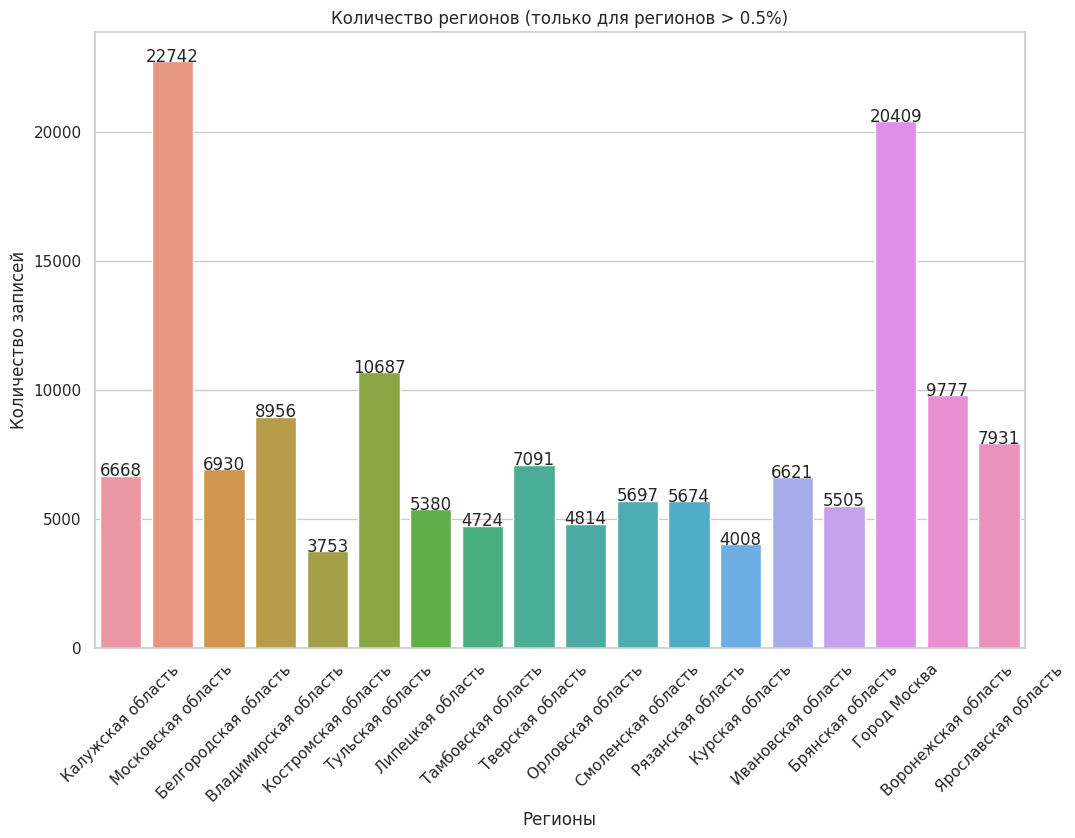

In [70]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='regionName', data=filtered_data)
plt.title('Количество регионов (только для регионов > 0.5%)')
plt.xlabel('Регионы')
plt.ylabel('Количество записей')

for p in ax.patches:
    if p.get_height() > threshold:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.xticks(rotation=45)
plt.show()

### **Гистограмма**

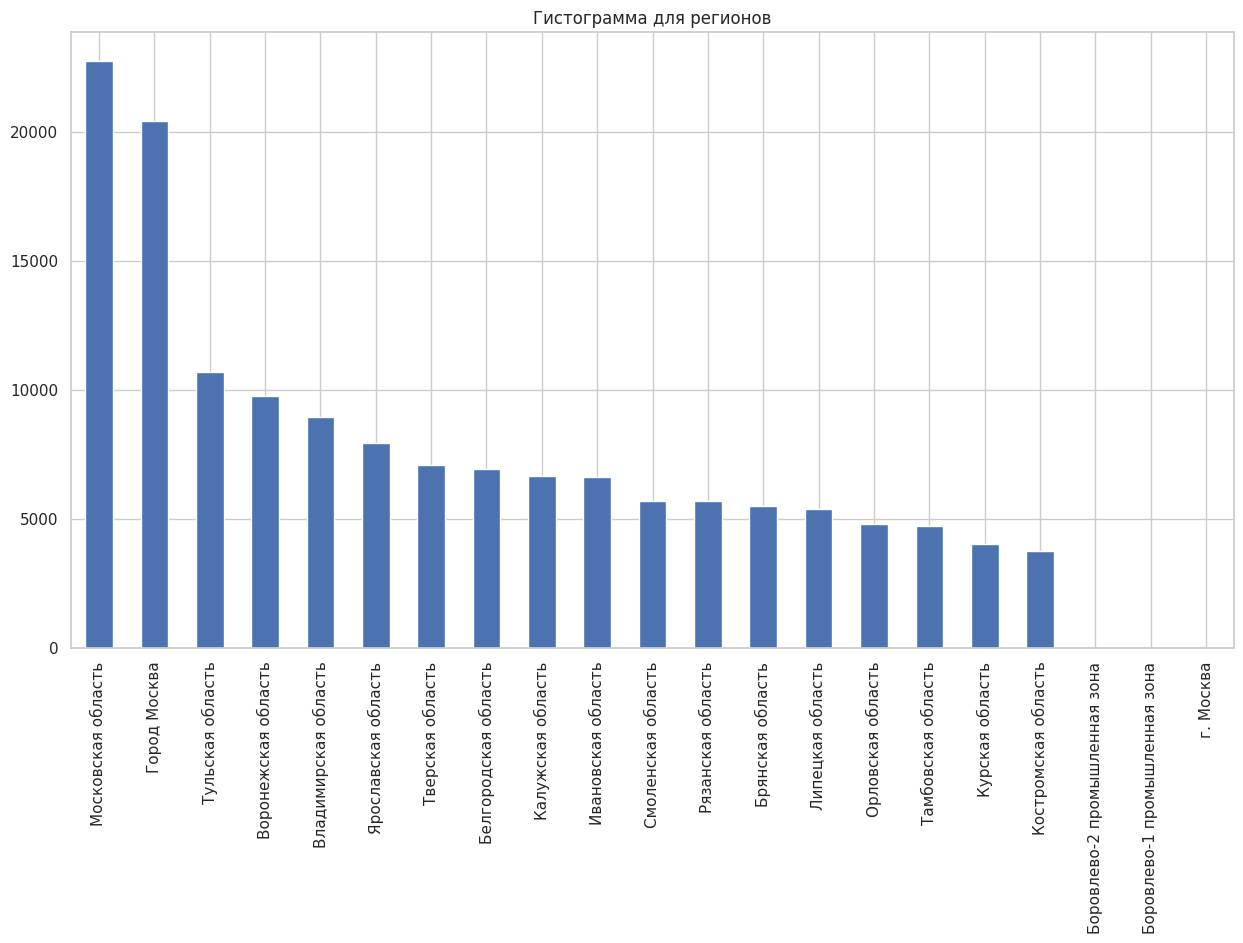

In [71]:
plt.figure(figsize=(15, 8))
df['regionName'].value_counts().plot(kind='bar', grid=True)
plt.title("Гистограмма для регионов")
plt.show()

## 6. **Требования к должности** - position_requirements

In [72]:
df.head(5)

busy_type                 education  \
0  Полная занятость  Среднее профессиональное   
1  Полная занятость                    Высшее   
2  Полная занятость                   Среднее   
3  Полная занятость  Среднее профессиональное   
4  Полная занятость                    Высшее   

                               position_requirements  \
0                      <p>Образование: фельдшер.</p>   
1  <ul> <li>Основы математической теории и перспе...   
2  <ul> <li>Опыт работы на производстве будет явл...   
3  Для трудоустройства инвалида 3 группы в соотве...   
4  <p><b>Юрисконсульт должен знать:</b></p> <p><!...   

                           position_responsibilities          regionName  \
0  <p>Работа с обращениями персонала, проведение ...   Калужская область   
1  <p></p> <ul> <li>Формирование конкретных знани...  Московская область   
2  <ul> <li>Выполнение операций согласно производ...  Московская область   
3  Знать рецептуру, технологию приготовления блюд...   Калужская область   
4  <p><b>Юрисконсульт должен обладать следующими ...  Московская область   

  required_drive_license  required_experience  salary_min  salary_max  \
0                     []                5.000   27000.000   27000.000   
1                     []                0.000   40000.000   60000.000   
2                     []                1.000   58000.000   78000.000   
3                     []                1.000   16250.000       0.000   
4                     []                2.000   40000.000   50000.000   

         schedule_type  state_region_code  \
0  Полный рабочий день      4000000000000   
1  Полный рабочий день      5000000000000   
2  Полный рабочий день      5000000000000   
3  Полный рабочий день      4000000000000   
4  Полный рабочий день      5000000000000   

                                     vacancy_address  \
0  Калужская область, Бабынинский район, Воротынс...   
1  Московская область, Город Серпухов, Липицы сел...   
2  Московская область, Город Мытищи, Проектируемы...   
3  Калужская область, Город Калуга, Воронина улиц...   
4  Московская область, Город Жуковский, Фрунзе ул...   

                      vacancy_name  \
0                         Фельдшер   
1                          Учитель   
2  Оператор производственной линии   
3                            Повар   
4       Специалист в сфере закупок   

                              professionalSphereName languageKnowledge  \
0           Здравоохранение и социальное обеспечение                []   
1                                 Образование, наука                []   
2                                       Производство                []   
3                             Пищевая промышленность                []   
4  Государственная служба, некоммерческие организ...                []   

  hardSkills softSkills  salary_diff  
0         []         []        0.000  
1         []         []   -20000.000  
2         []         []   -20000.000  
3         []         []    16250.000  
4         []         []   -10000.000

In [145]:
# Для начала надо заменить все NaN значения на текст. Например
df['position_requirements'] = df['position_requirements'].fillna("Не указано")

In [74]:
# Вывод нескольких ячеек для просмотра
for i in df['position_requirements'][:10]:
  print(i)
  print()

<p>Образование: фельдшер.</p>

<ul> <li>Основы математической теории и перспективных направлений развития современной математики</li> <li>Представление о широком спектре приложений математики и знание доступных обучающимся математических элементов этих приложений</li> <li></li> <li>Формировать у обучающихся убеждение в абсолютности математической истины и математического доказательства, предотвращать формирование модели поверхностной имитации действий, ведущих к успеху, без ясного понимания смысла; поощрять выбор различных путей в решении поставленной задачи</li> <li>Решать задачи элементарной математики соответствующей ступени образования, в том числе те новые, которые возникают в ходе работы с обучающимися, задачи олимпиад (включая новые задачи регионального этапа всероссийской олимпиады)</li> <li>Совместно с обучающимися применять методы и приемы понимания математического текста, его анализа, структуризации, реорганизации, трансформации</li> <li>Совместно с обучающимися проводить ан

### Фоматирование строк

In [75]:
def clean_text(text):
    cleaned_text = re.sub(r'[^а-яА-Я ]', '', str(text))
    return cleaned_text.strip()

In [76]:
df['position_requirements'] = df['position_requirements'].apply(clean_text)

In [77]:
# Вывод нескольких ячеек для просмотра
for i in df['position_requirements'][:10]:
  print(i)
  print()

Образование фельдшер

Основы математической теории и перспективных направлений развития современной математики Представление о широком спектре приложений математики и знание доступных обучающимся математических элементов этих приложений  Формировать у обучающихся убеждение в абсолютности математической истины и математического доказательства предотвращать формирование модели поверхностной имитации действий ведущих к успеху без ясного понимания смысла поощрять выбор различных путей в решении поставленной задачи Решать задачи элементарной математики соответствующей ступени образования в том числе те новые которые возникают в ходе работы с обучающимися задачи олимпиад включая новые задачи регионального этапа всероссийской олимпиады Совместно с обучающимися применять методы и приемы понимания математического текста его анализа структуризации реорганизации трансформации Совместно с обучающимися проводить анализ учебных и жизненных ситуаций в которых можно применить математический аппарат и 

In [136]:
# Ошибки в словах - Ответствекнность
# Нет пунктуации
# Кол-во проблелов

In [78]:
%%capture
!pip install spacy

In [ ]:
# Загрузка языковой модели для русского языка
!python -m spacy download ru_core_news_sm

In [80]:
import spacy

In [81]:
# Загрузка языковой модели
nlp = spacy.load("ru_core_news_sm")

In [82]:
# Ваш текст
text = "Юрисконсульт должен знать требования законодательства Российской Федерации и нормативных правовых актов регулирующих деятельность в сфере государственных и муниципальных закупок а также закупок осуществляемых отдельными видами юридических лиц основы гражданского бюджетного земельного трудового и административного законодательства в сфере государственных и муниципальных закупок"

# Обработка текста с помощью spaCy
doc = nlp(text)

# Форматирование текста с знаками препинания и без лишних пробелов
formatted_text = " ".join(token.text_with_ws for token in doc)

# Вывод результата
print(formatted_text)

Юрисконсульт  должен  знать  требования  законодательства  Российской  Федерации  и  нормативных  правовых  актов  регулирующих  деятельность  в  сфере  государственных  и  муниципальных  закупок  а  также  закупок  осуществляемых  отдельными  видами  юридических  лиц  основы  гражданского  бюджетного  земельного  трудового  и  административного  законодательства  в  сфере  государственных  и  муниципальных  закупок


In [83]:
# Функция для исправления текста (корректировка орфографических ошибок)
def clean_and_correct_text(text):
    doc = nlp(text)
    corrected_text = " ".join(token.text_with_ws for token in doc)
    return corrected_text

### Весь столбец

In [84]:
# Корректировка орфографических ошибок и форматирования текста во всем столбце.
df['position_requirements'] = df['position_requirements'][:10].apply(clean_and_correct_text)

In [85]:
# Вывод нескольких ячеек для просмотра
for i in df['position_requirements'][:10]:
  print(i)
  print()

Образование  фельдшер

Основы  математической  теории  и  перспективных  направлений  развития  современной  математики  Представление  о  широком  спектре  приложений  математики  и  знание  доступных  обучающимся  математических  элементов  этих  приложений    Формировать  у  обучающихся  убеждение  в  абсолютности  математической  истины  и  математического  доказательства  предотвращать  формирование  модели  поверхностной  имитации  действий  ведущих  к  успеху  без  ясного  понимания  смысла  поощрять  выбор  различных  путей  в  решении  поставленной  задачи  Решать  задачи  элементарной  математики  соответствующей  ступени  образования  в  том  числе  те  новые  которые  возникают  в  ходе  работы  с  обучающимися  задачи  олимпиад  включая  новые  задачи  регионального  этапа  всероссийской  олимпиады  Совместно  с  обучающимися  применять  методы  и  приемы  понимания  математического  текста  его  анализа  структуризации  реорганизации  трансформации  Совместно  с  обучающи

### pyspellchecker

In [86]:
!pip install pyspellchecker

In [87]:
from spellchecker import SpellChecker

In [88]:
# Функция для исправления орфографических ошибок и форматирования текста
def clean_and_correct_text_pyspellchecker(text):
    spell = SpellChecker(language='ru')

    # Исправление орфографических ошибок
    corrected_words = [spell.correction(str(word)) for word in text.split()]
    corrected_text = " ".join(corrected_words)

    return corrected_text

In [89]:
for i in df['position_requirements'][0].split():
  print(i)

Образование
фельдшер


In [90]:
spell = SpellChecker(language='ru')
t = []
n = 0
for text in df['position_requirements'][:2]:
  spell = SpellChecker(language='ru')
  print(n)
  print("text: ", text)
  print()
  corrected_words = [spell.correction(word) for word in text.split() if word is not None]
  print('corrected_words:', corrected_words)
  print()
  corrected_words_filtered = list(filter(lambda x: x is not None, corrected_words))
  corrected_text = " ".join(corrected_words_filtered)
  print(corrected_text)
  print()
  t.append(corrected_text)

0
text:  Образование  фельдшер

corrected_words: ['Образование', None]

Образование

0
text:  Основы  математической  теории  и  перспективных  направлений  развития  современной  математики  Представление  о  широком  спектре  приложений  математики  и  знание  доступных  обучающимся  математических  элементов  этих  приложений    Формировать  у  обучающихся  убеждение  в  абсолютности  математической  истины  и  математического  доказательства  предотвращать  формирование  модели  поверхностной  имитации  действий  ведущих  к  успеху  без  ясного  понимания  смысла  поощрять  выбор  различных  путей  в  решении  поставленной  задачи  Решать  задачи  элементарной  математики  соответствующей  ступени  образования  в  том  числе  те  новые  которые  возникают  в  ходе  работы  с  обучающимися  задачи  олимпиад  включая  новые  задачи  регионального  этапа  всероссийской  олимпиады  Совместно  с  обучающимися  применять  методы  и  приемы  понимания  математического  текста  его  анализ

In [91]:
# Применить ко всему столбцу
#df['position_requirements'] = df['position_requirements'][:10].apply(clean_and_correct_text_pyspellchecker)

In [92]:
# Вывод нескольких ячеек для просмотра
for i in df['position_requirements'][:10]:
  print(i)
  print()

Образование  фельдшер

Основы  математической  теории  и  перспективных  направлений  развития  современной  математики  Представление  о  широком  спектре  приложений  математики  и  знание  доступных  обучающимся  математических  элементов  этих  приложений    Формировать  у  обучающихся  убеждение  в  абсолютности  математической  истины  и  математического  доказательства  предотвращать  формирование  модели  поверхностной  имитации  действий  ведущих  к  успеху  без  ясного  понимания  смысла  поощрять  выбор  различных  путей  в  решении  поставленной  задачи  Решать  задачи  элементарной  математики  соответствующей  ступени  образования  в  том  числе  те  новые  которые  возникают  в  ходе  работы  с  обучающимися  задачи  олимпиад  включая  новые  задачи  регионального  этапа  всероссийской  олимпиады  Совместно  с  обучающимися  применять  методы  и  приемы  понимания  математического  текста  его  анализа  структуризации  реорганизации  трансформации  Совместно  с  обучающи

### deepmultilingualpunctuation

In [ ]:
!pip install deepmultilingualpunctuation

In [94]:
from deepmultilingualpunctuation import PunctuationModel

In [95]:
model = PunctuationModel()

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:169: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="none"` instead.
  warnings.warn(


### Пример из таблицы

In [96]:
text = "Водительское    удостоверение    категории    С    Ответственность    Пунктуальность"
result = model.restore_punctuation(text)
print(result)

Водительское удостоверение категории С: Ответственность Пунктуальность.


In [97]:
text = "Внимательность  пунктуальность  ответственность  без  вредных  привычек"
result = model.restore_punctuation(text)
print(result)

Внимательность, пунктуальность, ответственность без вредных привычек.


### Для всей таблицы

In [98]:
# Функция для исправления орфографических ошибок и форматирования текста
def restore_punctuation_text(text):
    return model.restore_punctuation(str(text))

In [99]:
df['position_requirements'] = df['position_requirements'][:10].apply(restore_punctuation_text)

## 7. **Должностные обязанности** - position_responsibilities

In [100]:
df.head(1)

busy_type                 education  position_requirements  \
0  Полная занятость  Среднее профессиональное  Образование фельдшер.   

                           position_responsibilities         regionName  \
0  <p>Работа с обращениями персонала, проведение ...  Калужская область   

  required_drive_license  required_experience  salary_min  salary_max  \
0                     []                5.000   27000.000   27000.000   

         schedule_type  state_region_code  \
0  Полный рабочий день      4000000000000   

                                     vacancy_address vacancy_name  \
0  Калужская область, Бабынинский район, Воротынс...     Фельдшер   

                     professionalSphereName languageKnowledge hardSkills  \
0  Здравоохранение и социальное обеспечение                []         []   

  softSkills  salary_diff  
0         []        0.000

In [144]:
# Для начала надо заменить все NaN значения на текст. Например
df['position_responsibilities'] = df['position_responsibilities'].fillna("Не указано")

In [102]:
# Вывод нескольких ячеек для просмотра
for i in df['position_responsibilities'][:5]:
  print(i)
  print()

<p>Работа с обращениями персонала, проведение педрейсовых медосмотров</p>

<p></p> <ul> <li>Формирование конкретных знаний, умений и навыков в области математики и информатики</li> <li>Формирование внутренней (мысленной) модели математической ситуации (включая пространственный образ)</li> <li>Формирование у обучающихся умения проверять математическое доказательство, приводить опровергающий пример</li> <li>Формирование у обучающихся умения выделять подзадачи в задаче, перебирать возможные варианты объектов и действий</li> <li>Формирование у обучающихся умения пользоваться заданной математической моделью, в частности, формулой, геометрической конфигурацией, алгоритмом, оценивать возможный результат моделирования (например - вычисления)</li> <li>Формирование материальной и информационной образовательной среды, содействующей развитию математических способностей каждого ребенка и реализующей принципы современной педагогики</li> <li>Формирование у обучающихся умения применять средства информ

### Фоматирование строк

In [103]:
# Удаление лишних символов
def clean_text(text):
    cleaned_text = re.sub(r'[^а-яА-Я ]', '', str(text))
    return cleaned_text.strip()

In [104]:
df['position_responsibilities'] = df['position_responsibilities'].apply(clean_text)

### Для всей таблицы

In [105]:
df['position_responsibilities'] = df['position_responsibilities'][:10].apply(restore_punctuation_text)

In [106]:
# Вывод нескольких ячеек для просмотра
for i in df['position_responsibilities'][:5]:
  print(i)
  print()

Работа с обращениями персонала. проведение педрейсовых медосмотров.

Формирование конкретных знаний, умений и навыков в области математики и информатики. Формирование внутренней мысленной модели математической ситуации, включая пространственный образ. Формирование у обучающихся умения проверять математическое доказательство, приводить опровергающий пример. Формирование у обучающихся умения выделять подзадачи в задаче, перебирать возможные варианты объектов и действий. Формирование у обучающихся умения пользоваться заданной математической моделью, в частности формулой, геометрической конфигурацией, алгоритмом, оценивать возможный результат моделирования, например вычисления. Формирование материальной и информационной образовательной среды содействующей развитию математических способностей каждого ребенка и реализующей принципы современной педагогики. Формирование у обучающихся умения применять средства информационнокоммуникационных технологий в решении задачи там, где это эффективно. Фо

## 8. **Необходимый опыт** - required_experience

In [107]:
df.head(1)

busy_type                 education  position_requirements  \
0  Полная занятость  Среднее профессиональное  Образование фельдшер.   

                           position_responsibilities         regionName  \
0  Работа с обращениями персонала. проведение пед...  Калужская область   

  required_drive_license  required_experience  salary_min  salary_max  \
0                     []                5.000   27000.000   27000.000   

         schedule_type  state_region_code  \
0  Полный рабочий день      4000000000000   

                                     vacancy_address vacancy_name  \
0  Калужская область, Бабынинский район, Воротынс...     Фельдшер   

                     professionalSphereName languageKnowledge hardSkills  \
0  Здравоохранение и социальное обеспечение                []         []   

  softSkills  salary_diff  
0         []        0.000

In [108]:
# Распределение зарплаты от
print(df['required_experience'].unique())


[ 5.  0.  1.  2.  3. nan 10.  4.  6.  7. 13. 22. 15.  8. 20. 12.  9. 11.
 30. 21.]


In [143]:
# Для начала надо заменить все NaN значения на текст. Например
df['required_experience'] = df['required_experience'].fillna(0)

In [110]:
# Распределение зарплаты от
print(df['required_experience'].unique())

[ 5.  0.  1.  2.  3. 10.  4.  6.  7. 13. 22. 15.  8. 20. 12.  9. 11. 30.
 21.]


### Изменение типа данных столбцов с float на int

In [111]:
# Изменение типа данных столбцов с float на int
df['required_experience'] = df['required_experience'].astype({'required_experience': int})

In [112]:
df['required_experience']

0         5
1         0
2         1
3         1
4         2
         ..
147464    0
147465    0
147466    0
147467    5
147468    1
Name: required_experience, Length: 147469, dtype: int64

## Количество вакансий в зависимости от опыта

In [113]:
df['required_experience'].value_counts()

0     98617
1     24154
3     14675
5      4481
2      3978
4       880
6       282
10      226
7        80
15       58
8        18
9         5
12        4
20        4
13        3
22        1
11        1
30        1
21        1
Name: required_experience, dtype: int64

In [114]:
df.loc[df['required_experience'] == 30]

busy_type education position_requirements  \
70828  Полная занятость    Высшее                   NaN   

      position_responsibilities            regionName required_drive_license  \
70828                       NaN  Белгородская область                     []   

       required_experience  salary_min  salary_max        schedule_type  \
70828                   30   60000.000       0.000  Полный рабочий день   

       state_region_code                                    vacancy_address  \
70828      3100000000000  Белгородская область, Ракитянский район, Проле...   

      vacancy_name professionalSphereName languageKnowledge hardSkills  \
70828  консультант      Высший менеджмент                []         []   

      softSkills  salary_diff  
70828         []    60000.000

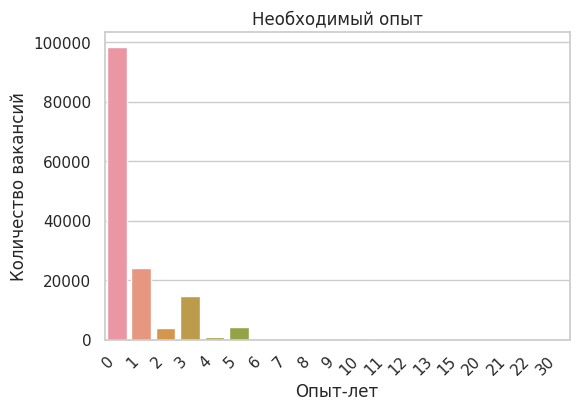

In [115]:
plt.figure(figsize=(6, 4))
sns.countplot(x='required_experience', data=df)
plt.title('Необходимый опыт')
plt.xlabel('Опыт-лет')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45, ha='right')
plt.show()

### Связь между опытом и зарплатой

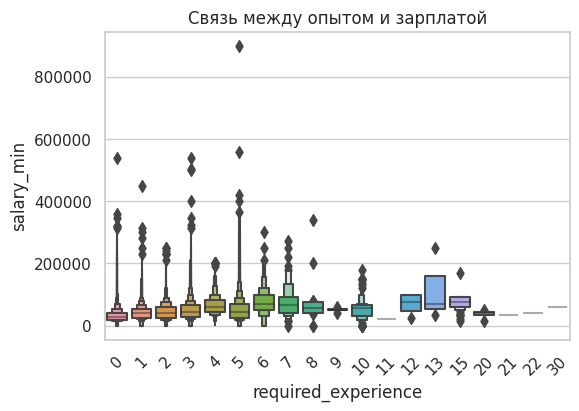

In [116]:
plt.figure(figsize=(6, 4))
sns.boxenplot(x='required_experience', y='salary_min', data=df)
plt.title('Связь между опытом и зарплатой')
plt.xticks(rotation=45)
plt.show()

## 10. **Название профессиональной сферы** - professionalSphereName

In [117]:
df.head(1)

busy_type                 education  position_requirements  \
0  Полная занятость  Среднее профессиональное  Образование фельдшер.   

                           position_responsibilities         regionName  \
0  Работа с обращениями персонала. проведение пед...  Калужская область   

  required_drive_license  required_experience  salary_min  salary_max  \
0                     []                    5   27000.000   27000.000   

         schedule_type  state_region_code  \
0  Полный рабочий день      4000000000000   

                                     vacancy_address vacancy_name  \
0  Калужская область, Бабынинский район, Воротынс...     Фельдшер   

                     professionalSphereName languageKnowledge hardSkills  \
0  Здравоохранение и социальное обеспечение                []         []   

  softSkills  salary_diff  
0         []        0.000

In [118]:
# Уникальные сферы
print(df['professionalSphereName'].unique())


['Здравоохранение и социальное обеспечение' 'Образование, наука'
 'Производство' 'Пищевая промышленность'
 'Государственная служба, некоммерческие организации'
 'Сельское хозяйство, экология, ветеринария' 'ЖКХ, эксплуатация'
 'Электроэнергетика' 'Металлургия, металлообработка'
 'Безопасность, службы охраны' 'Продажи, закупки, снабжение, торговля'
 'Рабочие специальности' 'Машиностроение' 'Юриспруденция'
 'Легкая промышленность'
 'Строительство, ремонт, стройматериалы, недвижимость'
 'Банки, кредит, страхование, пенсионное обеспечение'
 'Работы, не требующие квалификации' 'Спорт, фитнес, салоны красоты'
 'Транспорт, автобизнес, логистика, склад, ВЭД'
 'Административная работа, секретариат, АХО'
 'Информационные технологии, телекоммуникации, связь'
 'Туризм, гостиницы, рестораны' 'Бухгалтерия, налоги, управленческий учет'
 'Консалтинг, стратегическое развитие, управление'
 'Химическая, нефтехимическая, топливная промышленность'
 'Искусство, культура и развлечения'
 'Лесная, деревообрабат

### Количество сфер деятельности

In [119]:
df['professionalSphereName'].value_counts()

Производство                                                        27111
Здравоохранение и социальное обеспечение                            17353
Образование, наука                                                  11181
Продажи, закупки, снабжение, торговля                                9447
Транспорт, автобизнес, логистика, склад, ВЭД                         9168
ЖКХ, эксплуатация                                                    8074
Сельское хозяйство, экология, ветеринария                            5669
Пищевая промышленность                                               5104
Рабочие специальности                                                5004
Строительство, ремонт, стройматериалы, недвижимость                  4593
Работы, не требующие квалификации                                    4546
Машиностроение                                                       3866
Туризм, гостиницы, рестораны                                         3497
Государственная служба, некоммерческие

### Связь между сферой деятельности и зарплатой

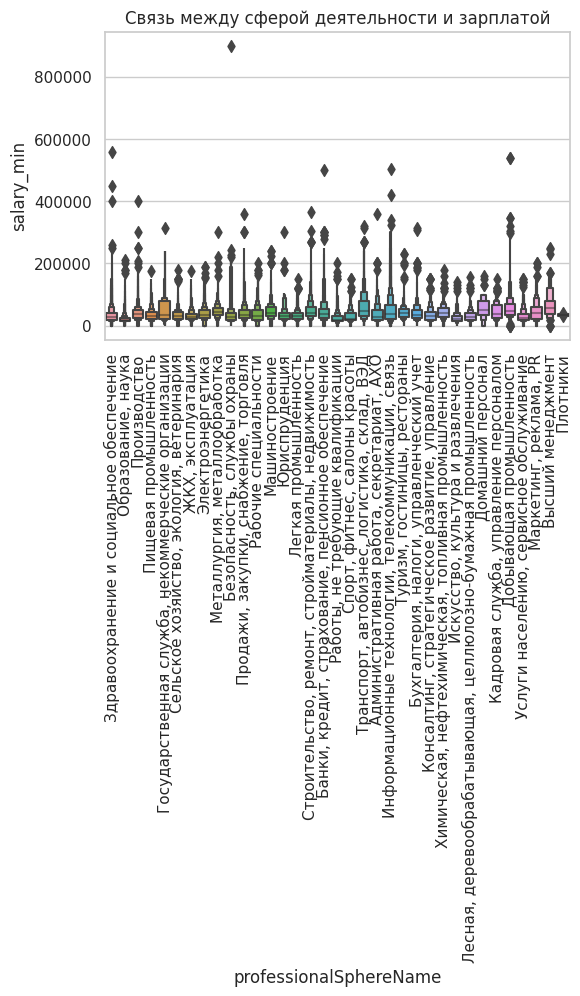

In [120]:
plt.figure(figsize=(6, 4))
sns.boxenplot(x='professionalSphereName', y='salary_min', data=df)
plt.title('Связь между сферой деятельности и зарплатой')
plt.xticks(rotation=90)
plt.show()

## **Столбцы**:
- languageKnowledge
- hardSkills
- softSkills
- required_drive_license


In [121]:
df.head(3)

busy_type                 education  \
0  Полная занятость  Среднее профессиональное   
1  Полная занятость                    Высшее   
2  Полная занятость                   Среднее   

                               position_requirements  \
0                              Образование фельдшер.   
1  Основы математической теории и перспективных н...   
2  Опыт работы на производстве будет являться пре...   

                           position_responsibilities          regionName  \
0  Работа с обращениями персонала. проведение пед...   Калужская область   
1  Формирование конкретных знаний, умений и навык...  Московская область   
2  Выполнение операций согласно производственному...  Московская область   

  required_drive_license  required_experience  salary_min  salary_max  \
0                     []                    5   27000.000   27000.000   
1                     []                    0   40000.000   60000.000   
2                     []                    1   58000.000   78000.000   

         schedule_type  state_region_code  \
0  Полный рабочий день      4000000000000   
1  Полный рабочий день      5000000000000   
2  Полный рабочий день      5000000000000   

                                     vacancy_address  \
0  Калужская область, Бабынинский район, Воротынс...   
1  Московская область, Город Серпухов, Липицы сел...   
2  Московская область, Город Мытищи, Проектируемы...   

                      vacancy_name                    professionalSphereName  \
0                         Фельдшер  Здравоохранение и социальное обеспечение   
1                          Учитель                        Образование, наука   
2  Оператор производственной линии                              Производство   

  languageKnowledge hardSkills softSkills  salary_diff  
0                []         []         []        0.000  
1                []         []         []   -20000.000  
2                []         []         []   -20000.000

### Примеры содержания в этих столбцах

In [122]:
print(df.shape)
print('languageKnowledge:', (df['languageKnowledge'] != '[]').sum())
print('hardSkills:', (df['hardSkills'] != '[]').sum())
print('softSkills: ', (df['softSkills'] != '[]').sum())
print('required_drive_license: ', (df['required_drive_license'] != '[]').sum())

(147469, 18)
languageKnowledge: 6994
hardSkills: 9611
softSkills:  5031
required_drive_license:  7871


Как видно кол-во очень мало

### Как выглядят заполненные ячейки:

In [123]:
df['required_drive_license'].unique()

array(['[]', '["C"]', '["D"]', '["B"]', '["B","D"]', '["B","C"]',
       '["C","E"]', '["B","C","D"]', '["B","D","C"]', '["B","C","E"]',
       '["B","C","D","E"]', '["C","D"]', '["A","B","C"]', '["C","D","E"]',
       '["C","B"]', '["B","D","C","E"]', '["E"]', '["A","B","C","D","E"]',
       '["A"]', '["E","C"]', '["D","C"]', '["B","E"]', '["B","E","C"]',
       '["E","C","B"]', '["B","E","C","D"]', '["D","E"]',
       '["C","A","B","D","E"]', '["C","B","D","E"]', '["B","C","E","D"]',
       '["D","B","C"]', '["C","B","D"]', '["D","B"]', '["A","B","C","D"]',
       '["C","D","B"]', '["E","C","D"]', '["B","A"]', '["D","C","B"]',
       '["B","D","E","A","C"]', '["E","D","B","C"]', '["D","C","E"]',
       '["B","D","E","C"]', '["E","D","C"]', '["B","E","A","D","C"]',
       '["E","A","B","C","D"]', '["C","D","B","A"]', '["A","C","D","B"]',
       '["D","E","B","C"]', '["A","B","D"]', '["D","E","C"]',
       '["B","C","D","A"]', '["A","B"]', '["B","C","E","A","D"]',
       '["B","E","D",

In [124]:
df['languageKnowledge'].unique()

array(['[]',
       '[{"code_language":"Русский","id_owner":"458875e6-029f-11ed-ae4f-d768660431c4","type":"LanguageKnowledge"}]',
       '[{"code_language":"Английский","id_owner":"441c0697-5eab-11ee-9738-cb26dff57dd7","level":"Способен пройти собеседование","type":"LanguageKnowledge"},{"code_language":"Русский","id_owner":"441c0697-5eab-11ee-9738-cb26dff57dd7","level":"Способен пройти собеседование","type":"LanguageKnowledge"}]',
       ...,
       '[{"code_language":"Русский","id_owner":"8a14cd10-62d1-11ee-97aa-e7d0d2cf29b1","level":"Родной","type":"LanguageKnowledge"}]',
       '[{"code_language":"Русский","id_owner":"88aaed96-66e5-11ec-83c4-4febb26dc4ec","type":"LanguageKnowledge"}]',
       '[{"code_language":"Английский","id_owner":"8473dae6-1f1a-11ee-aebb-0d972cff014f","level":"Свободный","type":"LanguageKnowledge"}]'],
      dtype=object)

In [125]:
df['hardSkills'].unique()

array(['[]',
       '[{"hard_skill_name":"умение работать в команде","owner_id":"46af2c65-8806-11ed-a1ee-17f530626801","type":"HardSkill"}]',
       '[{"hard_skill_name":"работа на производстве","owner_id":"43a86d18-f62f-11ec-98f4-d768660431c4","type":"HardSkill"},{"hard_skill_name":"пошив изделий","owner_id":"43a86d18-f62f-11ec-98f4-d768660431c4","type":"HardSkill"}]',
       ...,
       '[{"hard_skill_name":"работа с поставщиками","owner_id":"8879de98-8ebf-11ee-b33b-cb26dff57dd7","type":"HardSkill"},{"hard_skill_name":"учет первичной документации","owner_id":"8879de98-8ebf-11ee-b33b-cb26dff57dd7","type":"HardSkill"},{"hard_skill_name":"1с бухгалтерия","owner_id":"8879de98-8ebf-11ee-b33b-cb26dff57dd7","type":"HardSkill"},{"hard_skill_name":"excel","owner_id":"8879de98-8ebf-11ee-b33b-cb26dff57dd7","type":"HardSkill"}]',
       '[{"hard_skill_name":"профессионализм","owner_id":"864735c5-374c-11ee-99f9-0d972cff014f","type":"HardSkill"}]',
       '[{"hard_skill_name":"чтение чертежей","ow

In [126]:
df['softSkills'].unique()

array(['[]',
       '[{"owner_id":"45b03d15-098d-11ed-9fa4-57fc951f3846","soft_skill_name":"Ответственность","type":"SoftSkill"},{"owner_id":"45b03d15-098d-11ed-9fa4-57fc951f3846","soft_skill_name":"Работоспособность","type":"SoftSkill"}]',
       '[{"owner_id":"43a86d18-f62f-11ec-98f4-d768660431c4","soft_skill_name":"Аккуратность","type":"SoftSkill"},{"owner_id":"43a86d18-f62f-11ec-98f4-d768660431c4","soft_skill_name":"Исполнительность","type":"SoftSkill"},{"owner_id":"43a86d18-f62f-11ec-98f4-d768660431c4","soft_skill_name":"Ответственность","type":"SoftSkill"}]',
       ...,
       '[{"owner_id":"8879de98-8ebf-11ee-b33b-cb26dff57dd7","soft_skill_name":"Коммуникабельность","type":"SoftSkill"},{"owner_id":"8879de98-8ebf-11ee-b33b-cb26dff57dd7","soft_skill_name":"Нацеленность на результат","type":"SoftSkill"},{"owner_id":"8879de98-8ebf-11ee-b33b-cb26dff57dd7","soft_skill_name":"Умение анализировать большие объемы информации","type":"SoftSkill"}]',
       '[{"owner_id":"864735c5-374c-11e

### Преобработка данных

In [127]:
# Замена значений '[]' на 'Не задано' в указанных столбцах
columns_to_replace = ['languageKnowledge', 'hardSkills', 'softSkills', 'required_drive_license']
df[columns_to_replace] = df[columns_to_replace].replace('[]', 'Не задано')

In [128]:
df.head(3)

busy_type                 education  \
0  Полная занятость  Среднее профессиональное   
1  Полная занятость                    Высшее   
2  Полная занятость                   Среднее   

                               position_requirements  \
0                              Образование фельдшер.   
1  Основы математической теории и перспективных н...   
2  Опыт работы на производстве будет являться пре...   

                           position_responsibilities          regionName  \
0  Работа с обращениями персонала. проведение пед...   Калужская область   
1  Формирование конкретных знаний, умений и навык...  Московская область   
2  Выполнение операций согласно производственному...  Московская область   

  required_drive_license  required_experience  salary_min  salary_max  \
0              Не задано                    5   27000.000   27000.000   
1              Не задано                    0   40000.000   60000.000   
2              Не задано                    1   58000.000   78000.000   

         schedule_type  state_region_code  \
0  Полный рабочий день      4000000000000   
1  Полный рабочий день      5000000000000   
2  Полный рабочий день      5000000000000   

                                     vacancy_address  \
0  Калужская область, Бабынинский район, Воротынс...   
1  Московская область, Город Серпухов, Липицы сел...   
2  Московская область, Город Мытищи, Проектируемы...   

                      vacancy_name                    professionalSphereName  \
0                         Фельдшер  Здравоохранение и социальное обеспечение   
1                          Учитель                        Образование, наука   
2  Оператор производственной линии                              Производство   

  languageKnowledge hardSkills softSkills  salary_diff  
0         Не задано  Не задано  Не задано        0.000  
1         Не задано  Не задано  Не задано   -20000.000  
2         Не задано  Не задано  Не задано   -20000.000

### Очистка строк

In [129]:
# Функция для очистки строки столбца languageKnowledge
def clean_string_language(s):
    match = re.findall(r'(?<=code_language":")[А-Яа-я]+', s)
    return ', '.join(match)

In [130]:
# Функция для очистки строки столбца hardSkills
def clean_string_hardSkills(s):
    match = re.findall(r'(?<=hard_skill_name":")[А-Яа-я]+', s)
    return ', '.join(match)

In [131]:
# Функция для очистки строки столбца softSkills
def clean_string_softSkills(s):
    match = re.findall(r'(?<=soft_skill_name":")[А-Яа-я]+', s)
    return ', '.join(match)

In [132]:
df['languageKnowledge'] = df['languageKnowledge'].apply(clean_string_language)
df['hardSkills'] = df['hardSkills'].apply(clean_string_hardSkills)
df['softSkills'] = df['softSkills'].apply(clean_string_softSkills)

In [133]:
df['languageKnowledge'].unique()

array(['', 'Русский', 'Английский, Русский', 'Английский',
       'Русский, Английский', 'Китайский, Английский',
       'Английский, Немецкий', 'Английский, Китайский', 'Вьетнамский',
       'Немецкий, Английский', 'Корейский',
       'Русский, Английский, Немецкий', 'Китайский',
       'Английский, Русский, Китайский',
       'Английский, Русский, Вьетнамский',
       'Русский, Вьетнамский, Английский', 'Английский, Испанский',
       'Английский, Арабский, Испанский', 'Английский, Турецкий',
       'Немецкий', 'Турецкий, Английский', 'Грузинский',
       'Немецкий, Китайский, Английский',
       'Китайский, Русский, Английский', 'Турецкий, Русский',
       'Русский, Французский, Английский', 'Турецкий', 'Испанский',
       'Русский, Английский, Китайский, Вьетнамский',
       'Английский, Персидский, Арабский, Русский',
       'Русский, Вьетнамский', 'Английский, Вьетнамский',
       'Французский, Английский', 'Татский, Английский',
       'Сербскохорватский', 'Китайский, Русский',


In [134]:
df['hardSkills'].unique()

array(['', 'умение', 'работа, пошив', ...,
       'готовность, коммуникабельность, отсутствие, умение',
       'использование, обслуживание, ответственность', 'работа, учет'],
      dtype=object)

In [135]:
df['softSkills'].unique()

array(['', 'Ответственность, Работоспособность',
       'Аккуратность, Исполнительность, Ответственность', ...,
       'Коммуникабельность, Работа, Внимательность',
       'Коммуникабельность, Быстрая, Аккуратность',
       'Быстрая, Обучаемость'], dtype=object)

In [138]:
# Замена значений '[]' на 'Не задано' в указанных столбцах
columns_to_replace = ['languageKnowledge', 'hardSkills', 'softSkills', 'required_drive_license']
df[columns_to_replace] = df[columns_to_replace].replace('', 'Не задано')

In [139]:
# Пример данных
n = 0 # Берем первое резюме
for i in range(len(df.values[n])): # Выводим значение каждой графы резюме
  print(i, " ", df.values[n][i])

0   Полная занятость
1   Среднее профессиональное
2   Образование фельдшер.
3   Работа с обращениями персонала. проведение педрейсовых медосмотров.
4   Калужская область
5   Не задано
6   5
7   27000.0
8   27000.0
9   Полный рабочий день
10   4000000000000
11   Калужская область, Бабынинский район, Воротынск поселок, Промышленная улица, 3
12   Фельдшер
13   Здравоохранение и социальное обеспечение
14   Не задано
15   Не задано
16   Не задано
17   0.0


# **Общие графики**

In [ ]:
%%capture
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
%%capture
!pip install -U ydata-profiling[notebook]==4.0.0 matplotlib==3.5.1

In [ ]:
%%capture
!pip install ydata-profiling

In [ ]:
%%capture
!pip install -U ydata-profiling[notebook,unicode,pyspark]

In [ ]:
%%capture
!pip install pandas_profiling

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
# from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport

In [140]:
profile=ProfileReport(df)

In [141]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Предобработка и очистка данных**

In [146]:
df.head(3)

busy_type                 education  \
0  Полная занятость  Среднее профессиональное   
1  Полная занятость                    Высшее   
2  Полная занятость                   Среднее   

                               position_requirements  \
0                              Образование фельдшер.   
1  Основы математической теории и перспективных н...   
2  Опыт работы на производстве будет являться пре...   

                           position_responsibilities          regionName  \
0  Работа с обращениями персонала. проведение пед...   Калужская область   
1  Формирование конкретных знаний, умений и навык...  Московская область   
2  Выполнение операций согласно производственному...  Московская область   

  required_drive_license  required_experience  salary_min  salary_max  \
0              Не задано                    5   27000.000   27000.000   
1              Не задано                    0   40000.000   60000.000   
2              Не задано                    1   58000.000   78000.000   

         schedule_type  state_region_code  \
0  Полный рабочий день      4000000000000   
1  Полный рабочий день      5000000000000   
2  Полный рабочий день      5000000000000   

                                     vacancy_address  \
0  Калужская область, Бабынинский район, Воротынс...   
1  Московская область, Город Серпухов, Липицы сел...   
2  Московская область, Город Мытищи, Проектируемы...   

                      vacancy_name                    professionalSphereName  \
0                         Фельдшер  Здравоохранение и социальное обеспечение   
1                          Учитель                        Образование, наука   
2  Оператор производственной линии                              Производство   

  languageKnowledge hardSkills softSkills  salary_diff  
0         Не задано  Не задано  Не задано        0.000  
1         Не задано  Не задано  Не задано   -20000.000  
2         Не задано  Не задано  Не задано   -20000.000

## **Преобразование данных в численное значение**

In [147]:
from sklearn.preprocessing import LabelEncoder

#### Образования - **education**

In [148]:
le_edname = LabelEncoder()
le_edname.fit(df['education'])

df['education'] = le_edname.transform(df['education'])

#### **Тип занятости** - busy_type и schedule_type

In [149]:
le_busy_type = LabelEncoder()
le_busy_type.fit(df['busy_type'])

df['busy_type'] = le_busy_type.transform(df['busy_type'])

In [150]:
le_schedule_type = LabelEncoder()
le_schedule_type.fit(df['schedule_type'])

df['schedule_type'] = le_schedule_type.transform(df['schedule_type'])

### Таблица с конвертированными данными

In [151]:
df[['education','busy_type', 'schedule_type']].head()

education  busy_type  schedule_type
0          6          1              4
1          0          1              4
2          4          1              4
3          6          1              4
4          0          1              4

## **Нормализация данных зарплаты**

In [152]:
!pip install phik

In [153]:
import scipy.stats as stats
import phik

from sklearn.preprocessing import StandardScaler

In [154]:
before_norm = df[['salary_min', 'salary_max']]

In [155]:
before_norm

salary_min  salary_max
0        27000.000   27000.000
1        40000.000   60000.000
2        58000.000   78000.000
3        16250.000       0.000
4        40000.000   50000.000
...            ...         ...
147464  150000.000  150000.000
147465   25882.000       0.000
147466   16242.000       0.000
147467   50000.000   55000.000
147468   35000.000       0.000

[147469 rows x 2 columns]

In [156]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(before_norm)

In [157]:
scaled_df = pd.DataFrame(X_normalized, columns=before_norm.columns)

In [158]:
scaled_df

salary_min  salary_max
0           -0.413      -0.077
1            0.077       0.798
2            0.756       1.275
3           -0.818      -0.793
4            0.077       0.533
...            ...         ...
147464       4.224       3.185
147465      -0.455      -0.793
147466      -0.818      -0.793
147467       0.454       0.665
147468      -0.111      -0.793

[147469 rows x 2 columns]

## Преобразование значений в столбце **state_region_code**

In [159]:
df['state_region_code']

0         4000000000000
1         5000000000000
2         5000000000000
3         4000000000000
4         5000000000000
              ...      
147464    5000000000000
147465    6800000000000
147466    6200000000000
147467    7700000000000
147468    5700000000000
Name: state_region_code, Length: 147469, dtype: int64

In [160]:
# Преобразование значений в столбце
df['state_region_code'] = df['state_region_code'].astype(str).str.lstrip('0').str[:2].astype(int)

In [161]:
df['state_region_code']

0         40
1         50
2         50
3         40
4         50
          ..
147464    50
147465    68
147466    62
147467    77
147468    57
Name: state_region_code, Length: 147469, dtype: int64

# **Токенизация**

In [162]:
df.head(1)

busy_type  education  position_requirements  \
0          1          6  Образование фельдшер.   

                           position_responsibilities         regionName  \
0  Работа с обращениями персонала. проведение пед...  Калужская область   

  required_drive_license  required_experience  salary_min  salary_max  \
0              Не задано                    5   27000.000   27000.000   

   schedule_type  state_region_code  \
0              4                 40   

                                     vacancy_address vacancy_name  \
0  Калужская область, Бабынинский район, Воротынс...     Фельдшер   

                     professionalSphereName languageKnowledge hardSkills  \
0  Здравоохранение и социальное обеспечение         Не задано  Не задано   

  softSkills  salary_diff  
0  Не задано        0.000

In [ ]:
!pip install spacy

In [164]:
import gensim.models
import spacy

In [571]:
nlp = spacy.load("ru_core_news_sm")

df['vacancy_name'] = df['vacancy_name'][:10].apply(
    lambda x: [str(token).lower() for token in nlp(x) if
      not token.is_stop
      and not token.is_punct
      and not token.is_digit
      and not token.like_email
      and not token.like_num
      and not token.is_space
    ]
  )

In [572]:
df['vacancy_name'][:10]

0                             [фельдшер]
1                              [учитель]
2    [оператор, производственной, линии]
3                                [повар]
4           [специалист, сфере, закупок]
5                    [педагог, психолог]
6                              [плотник]
7                    [обработчик, птицы]
8                    [начальник, отряда]
9                 [водитель, автомобиля]
Name: vacancy_name, dtype: object

### Получение embeddings

In [573]:
df.head(1)

busy_type  education  position_requirements  \
0          1          6  Образование фельдшер.   

                           position_responsibilities         regionName  \
0  Работа с обращениями персонала. проведение пед...  Калужская область   

  required_drive_license  required_experience  salary_min  salary_max  \
0              Не задано                    5   27000.000   27000.000   

   schedule_type  state_region_code  \
0              4                 40   

                                     vacancy_address vacancy_name  \
0  Калужская область, Бабынинский район, Воротынс...   [фельдшер]   

                     professionalSphereName languageKnowledge hardSkills  \
0  Здравоохранение и социальное обеспечение         Не задано  Не задано   

  softSkills  salary_diff  
0  Не задано        0.000

##### Обработка полей **position_responsibilities** и **position_requirements**

Создадим словарь из текстов **position_responsibilities** и **position_requirements**

In [171]:
# Для начала надо заменить все NaN значения на текст. Например
df['vacancy_name'] = df['vacancy_name'].fillna("Не указано")

In [172]:
texts = df['vacancy_name']
texts

0                                                Фельдшер
1                                                 Учитель
2                         Оператор производственной линии
3                                                   Повар
4                              Специалист в сфере закупок
                               ...                       
147464                               Водитель категории E
147465        Инженер по развитию в сфере связи Токаревка
147466                              подсобный рабочий (5)
147467    Инженер по организации управления производством
147468                                    Оператор-кассир
Name: vacancy_name, Length: 147469, dtype: object

In [173]:
fasttext = gensim.models.FastText(
    vector_size=256,
    window=7,
    min_count=1
    )

In [174]:
# Обучение
fasttext.build_vocab(corpus_iterable=texts)

fasttext.train(
    corpus_iterable=texts,
    total_examples=len(texts),
    epochs=25
    )

(23971880, 99000350)

In [175]:
# Функция, возвращает векторизированное предложение
def get_vector(model, sentence):
    sentence_vector = []

    if len(sentence) == 0:
        # Пустые предложения заполним их одним  словом
        token_vector = np.zeros(256)
        sentence_vector.append(token_vector)
    else:
        for token in sentence:
            try:
                token_vector = model.wv[token]
            except KeyError as e:
                # Случай  слова
                token_vector = np.zeros(256)
            finally:
                sentence_vector.append(token_vector)

    return np.mean(sentence_vector, axis=0)

In [177]:
vectors = []

for item in df['vacancy_name']:
    vectors.append(get_vector(fasttext, item))

cols = [f'feature_{i + 1}' for i in range(256)]
custom_position = pd.DataFrame(vectors, columns=cols)

df = pd.concat([df, custom_position], axis=1)

In [178]:
df

busy_type  education  \
0               1          6   
1               1          0   
2               1          4   
3               1          6   
4               1          0   
...           ...        ...   
147464          1          1   
147465          1          6   
147466          0          1   
147467          1          0   
147468          1          1   

                                    position_requirements  \
0                                   Образование фельдшер.   
1       Основы математической теории и перспективных н...   
2       Опыт работы на производстве будет являться пре...   
3       Для трудоустройства инвалида группы в соответс...   
4       Юрисконсульт должен знать требования законодат...   
...                                                   ...   
147464                                         Не указано   
147465                                         Не указано   
147466                                         Не указано   
147467                                         Не указано   
147468                                         Не указано   

                                position_responsibilities          regionName  \
0       Работа с обращениями персонала. проведение пед...   Калужская область   
1       Формирование конкретных знаний, умений и навык...  Московская область   
2       Выполнение операций согласно производственному...  Московская область   
3       Знать рецептуру, технологию приготовления блюд...   Калужская область   
4       Юрисконсульт должен обладать следующими базовы...  Московская область   
...                                                   ...                 ...   
147464                                         Не указано  Московская область   
147465                                         Не указано  Тамбовская область   
147466                                         Не указано   Рязанская область   
147467                                         Не указано        Город Москва   
147468                                         Не указано   Орловская область   

       required_drive_license  required_experience  salary_min  salary_max  \
0                   Не задано                    5   27000.000   27000.000   
1                   Не задано                    0   40000.000   60000.000   
2                   Не задано                    1   58000.000   78000.000   
3                   Не задано                    1   16250.000       0.000   
4                   Не задано                    2   40000.000   50000.000   
...                       ...                  ...         ...         ...   
147464              Не задано                    0  150000.000  150000.000   
147465              Не задано                    0   25882.000       0.000   
147466              Не задано                    0   16242.000       0.000   
147467              Не задано                    5   50000.000   55000.000   
147468              Не задано                    1   35000.000       0.000   

        schedule_type  ...  feature_247 feature_248 feature_249 feature_250  \
0                   4  ...        0.122       0.080      -0.039       0.044   
1                   4  ...        0.065      -0.129       0.012      -0.271   
2                   4  ...       -0.135       0.118      -0.073      -0.011   
3                   4  ...        0.177       0.290      -0.221      -0.012   
4                   4  ...       -0.121       0.188      -0.261       0.011   
...               ...  ...          ...         ...         ...         ...   
147464              0  ...       -0.016       0.106      -0.206       0.084   
147465              4  ...       -0.156       0.176      -0.299       0.061   
147466              3  ...       -0.097       0.127       0.052      -0.020   
147467              4  ...       -0.195       0.109      -0.094       0.021   
147468              4  ...        0.014       0.196      -0.216       0.003   

       feature_251 feature_252 